# Predicting Diabetes Diagnosis

Per [the Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20fasting%20blood%20sugar%20level,separate%20tests%2C%20you%20have%20diabetes.), the Glycated Hemoglobin (A1C) test indicates a person's average blood sugar level for the past two to three months. It measures the percentage of blood sugar attached to hemoglobin, the oxygen-carrying protein in red blood cells. This test is a blood test which does not require fasting.

The higher your blood sugar levels, the more hemoglobin you'll have with sugar attached. 
* A1C level of 6.5% or higher on two separate tests indicates that you have diabetes
* A1C between 5.7 and 6.4 % indicates prediabetes
* A1C below 5.7 is considered normal

# Data Source

## National Health and Nutrition Examination Survey (NHANES)

The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) is a program of continuous studies designed to assess the health and nutritional status of adults and children in the United States. The survey examines a nationally representative sample of about 5,000 persons located across the country each year. The survey is unique in that it combines interviews and physical examinations. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

## Subset for Predicting Diabetes

While NHANES collects a wealth of demographic, laboratory, and medical data, this analysis and predictive model uses a subset comprised of:

* Demographics - collected by trained interviewers using Computer-Assisted Personal Interview (CAPI) system in either English or Spanish, sometimes with assistance from an interpreter. Individuals 16 years and older and emancipated minors were interviewed directly; a proxy provided information for survey participants who were under 16 and for participants who could not answer the questions themselves.

* Body Measures - measured by trained health technicians in the Mobile Examination Center (MEC). 

* Smoking Survey

* Physical Activity Survey

* Blood Pressure

* Total Cholesterol

* A1C

* Insulin


In [1]:
import pandas as pd
pd.set_option('display.max_columns', 0)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
demographic = pd.read_sas('./data/NHANES2017-2018_demographic.xpt')
insurance = pd.read_sas('./data/NHANES2017-2018_insurance.xpt')
measures = pd.read_sas('./data/NHANES2017-2018_body_measures.xpt')
activity = pd.read_sas('./data/NHANES2017-2018_physical_activity.xpt')
smoking = pd.read_sas('./data/NHANES2017-2018_smoking.xpt')

a1c = pd.read_sas('./data/NHANES2017-2018_a1c.xpt')

# Datasets considered, but not used for this model
# bp = pd.read_sas('./data/NHANES2017-2018_blood_pressure_oscillometric.xpt')
# chol_total = pd.read_sas('./data/NHANES2017-2018_total_cholesterol.xpt')
# chol_hdl = pd.read_sas('./data/NHANES2017-2018_hdl_cholesterol.xpt')
# chol_ldl = pd.read_sas('./data/NHANES2017-2018_ldl_cholesterol.xpt')
# insulin = pd.read_sas('./data/NHANES2017-2018_insulin.xpt')

In [3]:
data = [a1c, demographic, insurance, measures, activity, smoking]

In [4]:
for f in data:
    f.SEQN = f.SEQN.map(lambda x: int(x))
    f.set_index('SEQN', inplace=True)
    display(f.info())
    print('*****'*15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 93705 to 102956
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LBXGH   6045 non-null   float64
dtypes: float64(1)
memory usage: 100.0 KB


None

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 93703 to 102956
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  9254 non-null   float64
 1   RIDSTATR  9254 non-null   float64
 2   RIAGENDR  9254 non-null   float64
 3   RIDAGEYR  9254 non-null   float64
 4   RIDAGEMN  597 non-null    float64
 5   RIDRETH1  9254 non-null   float64
 6   RIDRETH3  9254 non-null   float64
 7   RIDEXMON  8704 non-null   float64
 8   RIDEXAGM  3433 non-null   float64
 9   DMQMILIZ  6004 non-null   float64
 10  DMQADFC   561 non-null    float64
 11  DMDBORN4  9254 non-null   float64
 12  DMDCITZN  9251 non-null   float64
 13  DMDYRSUS  1948 non-null   float64
 14  DMDEDUC3  2306 non-null   float64
 15  DMDEDUC2  5569 non-null   float64
 16  DMDMARTL  5569 non-null   float64
 17  RIDEXPRG  1110 non-null   float64
 18  SIALANG   9254 non-null   

None

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 93703 to 102956
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HIQ011    9254 non-null   float64
 1   HIQ031A   4254 non-null   float64
 2   HIQ031B   1582 non-null   float64
 3   HIQ031C   58 non-null     float64
 4   HIQ031D   2527 non-null   float64
 5   HIQ031E   93 non-null     float64
 6   HIQ031F   295 non-null    float64
 7   HIQ031H   533 non-null    float64
 8   HIQ031I   301 non-null    float64
 9   HIQ031J   708 non-null    float64
 10  HIQ031AA  1 non-null      float64
 11  HIQ260    172 non-null    float64
 12  HIQ105    1141 non-null   float64
 13  HIQ270    8171 non-null   float64
 14  HIQ210    8171 non-null   float64
dtypes: float64(15)
memory usage: 1.1 MB


None

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 93703 to 102956
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMDSTATS  8704 non-null   float64
 1   BMXWT     8580 non-null   float64
 2   BMIWT     416 non-null    float64
 3   BMXRECUM  894 non-null    float64
 4   BMIRECUM  24 non-null     float64
 5   BMXHEAD   194 non-null    float64
 6   BMIHEAD   0 non-null      float64
 7   BMXHT     8016 non-null   float64
 8   BMIHT     99 non-null     float64
 9   BMXBMI    8005 non-null   float64
 10  BMXLEG    6703 non-null   float64
 11  BMILEG    334 non-null    float64
 12  BMXARML   8177 non-null   float64
 13  BMIARML   347 non-null    float64
 14  BMXARMC   8173 non-null   float64
 15  BMIARMC   350 non-null    float64
 16  BMXWAIST  7601 non-null   float64
 17  BMIWAIST  437 non-null    float64
 18  BMXHIP    6039 non-null   

None

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 93705 to 102956
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PAQ605  5856 non-null   float64
 1   PAQ610  1389 non-null   float64
 2   PAD615  1381 non-null   float64
 3   PAQ620  5856 non-null   float64
 4   PAQ625  2439 non-null   float64
 5   PAD630  2426 non-null   float64
 6   PAQ635  5856 non-null   float64
 7   PAQ640  1439 non-null   float64
 8   PAD645  1430 non-null   float64
 9   PAQ650  5856 non-null   float64
 10  PAQ655  1434 non-null   float64
 11  PAD660  1431 non-null   float64
 12  PAQ665  5856 non-null   float64
 13  PAQ670  2308 non-null   float64
 14  PAD675  2301 non-null   float64
 15  PAD680  5846 non-null   float64
dtypes: float64(16)
memory usage: 777.8 KB


None

***************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6724 entries, 93705 to 102956
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    5856 non-null   float64
 1   SMD030    2359 non-null   float64
 2   SMQ040    2359 non-null   float64
 3   SMQ050Q   1338 non-null   float64
 4   SMQ050U   1255 non-null   float64
 5   SMD057    1338 non-null   float64
 6   SMQ078    793 non-null    float64
 7   SMD641    1063 non-null   float64
 8   SMD650    1022 non-null   float64
 9   SMD093    1021 non-null   float64
 10  SMDUPCA   6724 non-null   object 
 11  SMD100BR  6724 non-null   object 
 12  SMD100FL  929 non-null    float64
 13  SMD100MN  929 non-null    float64
 14  SMD100LN  929 non-null    float64
 15  SMD100TR  695 non-null    float64
 16  SMD100NI  695 non-null    float64
 17  SMD100CO  695 non-null    float64
 18  SMQ621    821 non-null    

None

***************************************************************************


### Demographics 

[View source for additional description and details](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm)

Comprised of individual, family, and household-level information. 

In [5]:
demographic.describe().round(1)

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,9254.0,9254.0,9254.0,9254.0,597.0,9254.0,9254.0,8704.0,3433.0,6004.0,561.0,9254.0,9251.0,1948.0,2306.0,5569.0,5569.0,1110.0,9254.0,9254.0,9254.0,8780.0,8780.0,8780.0,6684.0,6684.0,6684.0,4977.0,9254.0,9254.0,9254.0,9254.0,9254.0,9254.0,9254.0,8764.0,9063.0,4751.0,9254.0,9254.0,9254.0,9254.0,8763.0,8780.0,8023.0
mean,10.0,1.9,1.5,34.3,10.4,3.2,3.5,1.5,107.5,1.9,1.5,1.2,1.1,9.3,6.3,3.5,2.7,2.0,1.1,1.7,2.0,1.1,2.0,2.0,1.1,2.0,2.0,1.1,3.7,3.6,0.5,0.9,0.5,1.5,2.9,2.1,1.5,2.1,34670.7,34670.7,1.5,141.0,12.5,12.2,2.4
std,0.0,0.2,0.5,25.5,7.1,1.3,1.7,0.5,70.6,0.3,0.6,1.6,0.5,18.6,5.8,1.2,3.1,0.4,0.3,0.5,0.2,0.3,0.0,0.2,0.3,0.1,0.1,0.4,1.7,1.8,0.8,1.1,0.8,0.5,0.8,0.7,0.7,0.7,41356.7,43344.0,0.5,4.2,17.3,17.2,1.6
min,10.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2571.1,0.0,1.0,134.0,1.0,1.0,0.0
25%,10.0,2.0,1.0,11.0,4.0,3.0,3.0,1.0,43.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,13074.4,12347.3,1.0,137.0,6.0,6.0,1.0
50%,10.0,2.0,2.0,31.0,10.0,3.0,3.0,2.0,106.0,2.0,1.0,1.0,1.0,6.0,6.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,3.0,2.0,1.0,2.0,21098.5,21059.9,2.0,141.0,8.0,8.0,1.9
75%,10.0,2.0,2.0,58.0,17.0,4.0,4.0,2.0,166.0,2.0,2.0,1.0,1.0,7.0,9.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,3.0,36923.3,37562.0,2.0,145.0,14.0,14.0,3.7
max,10.0,2.0,2.0,80.0,24.0,5.0,7.0,2.0,239.0,9.0,7.0,99.0,9.0,99.0,66.0,9.0,77.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,7.0,7.0,3.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,433085.0,419762.8,2.0,148.0,99.0,99.0,5.0


In [6]:
demographic.columns

Index(['SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4',
       'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG',
       'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
       'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ',
       'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ',
       'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA',
       'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

In [7]:
keepcols_demographic = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN',
                    'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'DMDHHSIZ', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR']

In [8]:
keep_demographic = demographic.copy()[keepcols_demographic]
keep_demographic.rename(mapper={'RIAGENDR': 'gender',
                                'RIDAGEYR': 'age',
                                'RIDRETH3': 'race',
                                'DMQMILIZ': 'veteran_status',
                                'DMDBORN4': 'country_of_birth',
                                'DMDCITZN': 'citizen_status',
                                'DMDEDUC2': 'education',
                                'DMDMARTL': 'marital_status',
                                'RIDEXPRG': 'pregnancy_status',
                                'INDHHIN2': 'annual_household_income',
                                'INDFMIN2': 'annual_family_income',
                                'INDFMPIR': 'income_poverty_ratio',
                                'DMDHHSIZ': 'household_size'}, 
                       axis=1, inplace=True)
keep_demographic

,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio
SEQN,,,,,,,,,,,,,
93703,2.0,2.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,5.0,15.0,15.0,5.00
93704,1.0,2.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,15.0,15.0,5.00
93705,2.0,66.0,4.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,3.0,3.0,0.82
93706,1.0,18.0,6.0,2.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
93707,1.0,13.0,7.0,NaN,1.0,1.0,NaN,NaN,NaN,7.0,10.0,10.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,2.0,70.0,6.0,2.0,2.0,1.0,3.0,1.0,NaN,2.0,4.0,4.0,0.95
102953,1.0,42.0,1.0,2.0,2.0,2.0,3.0,4.0,NaN,1.0,12.0,12.0,NaN
102954,2.0,41.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,7.0,10.0,10.0,1.18


In [9]:
keep_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 93703 to 102956
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   9254 non-null   float64
 1   age                      9254 non-null   float64
 2   race                     9254 non-null   float64
 3   veteran_status           6004 non-null   float64
 4   country_of_birth         9254 non-null   float64
 5   citizen_status           9251 non-null   float64
 6   education                5569 non-null   float64
 7   marital_status           5569 non-null   float64
 8   pregnancy_status         1110 non-null   float64
 9   household_size           9254 non-null   float64
 10  annual_household_income  8763 non-null   float64
 11  annual_family_income     8780 non-null   float64
 12  income_poverty_ratio     8023 non-null   float64
dtypes: float64(13)
memory usage: 1012.2 KB


Notes:
* Age 
    * Individuals aged 80 and over are topcoded at 80. In NHANES 2017-2018, the weighted mean age for participants 80+ is 85
    * Individuals' ages are reported in months for those 24 months (2 yrs) and younger
* Income-Poverty Ratio - calculated by dividing family (or individual) income by the poverty guidelines specific to the survey year. The value was not computed if the respondent only reported income as < 20,000 or ≥ 20,000. If family income was reported as a more detailed category, the midpoint of the range was used to compute the ratio. Values at or above 5.00 were coded as 5.00 or more because of disclosure concerns. The values were not computed if the income data was missing.


### Health Insurance

[Source](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/HIQ_J.htm)

The Health Insurance questionnaire (variable name prefix HIQ) provides respondent-level interview data on insurance coverage, type of insurance coverage, coverage of prescription drugs, and uninsured status during the past 12 months.

In [10]:
insurance

,HIQ011,HIQ031A,HIQ031B,HIQ031C,HIQ031D,HIQ031E,HIQ031F,HIQ031H,HIQ031I,HIQ031J,HIQ031AA,HIQ260,HIQ105,HIQ270,HIQ210
SEQN,,,,,,,,,,,,,,,
93703,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93704,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93705,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
93706,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93707,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
102953,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
102954,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [11]:
insurance.columns

Index(['HIQ011', 'HIQ031A', 'HIQ031B', 'HIQ031C', 'HIQ031D', 'HIQ031E',
       'HIQ031F', 'HIQ031H', 'HIQ031I', 'HIQ031J', 'HIQ031AA', 'HIQ260',
       'HIQ105', 'HIQ270', 'HIQ210'],
      dtype='object')

In [12]:
keepcols_insurance = ['HIQ011', 'HIQ031A', 'HIQ031B', 'HIQ031C', 'HIQ031D', 'HIQ031E',
       'HIQ031F', 'HIQ031H', 'HIQ031I', 'HIQ031J', 'HIQ031AA', 'HIQ270', 'HIQ210']

mapper_insurance = {'HIQ011': 'coverage_status',
          'HIQ031A': 'covered_private',
          'HIQ031B': 'covered_medicare',
          'HIQ031C': 'covered_medigap',
          'HIQ031D': 'covered_medicaid',
          'HIQ031E': 'covered_chip',
          'HIQ031F': 'covered_military',
          'HIQ031H': 'covered_state',
          'HIQ031I': 'covered_other_gov',
          'HIQ031J': 'covered_single_service',
          'HIQ031AA': 'not_covered',
          'HIQ270': 'prescription_coverage',
          'HIQ210': 'uninsured_in_last_year'}

In [13]:
keep_insurance = insurance[keepcols_insurance]
keep_insurance.rename(mapper=mapper_insurance, axis=1, inplace=True)
keep_insurance

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year
SEQN,,,,,,,,,,,,,
93703,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93704,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93705,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93706,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
93707,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
102953,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
102954,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [14]:
display(keep_insurance.coverage_status.value_counts())
display(keep_insurance.coverage_status.value_counts(normalize=True))

1.0    8157
2.0    1072
9.0      18
7.0       7
Name: coverage_status, dtype: int64

1.0    0.881457
2.0    0.115842
9.0    0.001945
7.0    0.000756
Name: coverage_status, dtype: float64

In [15]:
display(keep_insurance.uninsured_in_last_year.value_counts())
display(keep_insurance.uninsured_in_last_year.value_counts(normalize=True))

2.0    7591
1.0     561
9.0      18
7.0       1
Name: uninsured_in_last_year, dtype: int64

2.0    0.929017
1.0    0.068657
9.0    0.002203
7.0    0.000122
Name: uninsured_in_last_year, dtype: float64

Coverage status values:
* 1.0 - Yes
* 2.0 - No
* 7.0 - Refused
* 9.0 - Don't know

### Body Measures

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm

NHANES body measures data are used to monitor trends in infant and child growth, to estimate the prevalence of overweight and obesity in U.S. children, adolescents, and adults, and to examine the associations between body weight and the health and nutritional status of the U.S. population.

All survey participants were eligible for the body measures component. There were no medical, safety, or other exclusions for the body measurements protocol. The health technicians used their discretion to obtain as many measures as practical for persons who used a wheelchair.

In [16]:
measures

,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
SEQN,,,,,,,,,,,,,,,,,,,,
93703,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN
93704,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN
93705,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,31.7,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN
93706,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,21.5,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN
93707,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,18.1,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,1.0,49.0,NaN,NaN,NaN,NaN,NaN,156.5,NaN,20.0,34.4,NaN,32.6,NaN,25.1,NaN,82.2,NaN,87.3,NaN
102953,1.0,97.4,NaN,NaN,NaN,NaN,NaN,164.9,NaN,35.8,38.2,NaN,36.6,NaN,40.6,NaN,114.8,NaN,112.8,NaN
102954,1.0,69.1,NaN,NaN,NaN,NaN,NaN,162.6,NaN,26.1,39.2,NaN,35.2,NaN,26.8,NaN,86.4,NaN,102.7,NaN


In [17]:
measures.columns

Index(['BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
       'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXARML',
       'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP',
       'BMIHIP'],
      dtype='object')

In [18]:
keepcols_measures = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMXHIP']

In [19]:
keep_measures = measures[keepcols_measures]
keep_measures.rename(mapper={'BMXWT': 'weight_kg', 
                             'BMXHT': 'height_cm',
                             'BMXBMI': 'BMI',
                             'BMXWAIST': 'waist_circumference_cm',
                             'BMXHIP': 'hip_circumference_cm'},
                    axis=1, inplace=True)
keep_measures

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm
SEQN,,,,,
93703,13.7,88.6,17.5,48.2,NaN
93704,13.9,94.2,15.7,50.0,NaN
93705,79.5,158.3,31.7,101.8,110.0
93706,66.3,175.7,21.5,79.3,94.4
93707,45.4,158.4,18.1,64.1,83.0
...,...,...,...,...,...
102952,49.0,156.5,20.0,82.2,87.3
102953,97.4,164.9,35.8,114.8,112.8
102954,69.1,162.6,26.1,86.4,102.7


### Physical Activity

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/PAQ_J.htm

Data obtained from the respondent-level interview and questionnaire on physical activity.

In [20]:
activity

,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
SEQN,,,,,,,,,,,,,,,,
93705,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,60.0,300.0
93706,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,45.0,2.0,NaN,NaN,1.0,2.0,30.0,240.0
93708,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,30.0,120.0
93709,2.0,NaN,NaN,1.0,2.0,180.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,600.0
93711,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,60.0,1.0,4.0,60.0,1.0,2.0,30.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,60.0
102952,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,6.0,60.0,120.0
102953,1.0,3.0,240.0,1.0,3.0,240.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,360.0


In [21]:
activity.columns

Index(['PAQ605', 'PAQ610', 'PAD615', 'PAQ620', 'PAQ625', 'PAD630', 'PAQ635',
       'PAQ640', 'PAD645', 'PAQ650', 'PAQ655', 'PAD660', 'PAQ665', 'PAQ670',
       'PAD675', 'PAD680'],
      dtype='object')

In [22]:
keepcols_activity = ['PAD615', 'PAQ610', 'PAD630', 'PAQ625', 'PAQ640', 'PAD645', 'PAD660', 
                     'PAQ655', 'PAD675', 'PAQ670', 'PAD680']
mapper_activity = {'PAD615':'work_vigorous_minperday', 
                   'PAQ610': 'work_vigorous_daysperweek',
                   'PAD630': 'work_moderate_minperday', 
                   'PAQ625': 'work_moderate_daysperweek',
                   'PAD645': 'transportation_minperday', 
                   'PAQ640': 'transportation_daysperweek',
                   'PAD660': 'recreation_vigorous_minperday', 
                   'PAQ655': 'recreation_vigorous_daysperweek',
                   'PAD675': 'recreation_moderate_minperday', 
                   'PAQ670': 'recreation_moderate_daysperweek',
                   'PAD680': 'sedentary_minsperday'}

In [23]:
keep_activity = activity[keepcols_activity].rename(mapper=mapper_activity, axis=1).fillna(0)
keep_activity

,work_vigorous_minperday,work_vigorous_daysperweek,work_moderate_minperday,work_moderate_daysperweek,transportation_daysperweek,transportation_minperday,recreation_vigorous_minperday,recreation_vigorous_daysperweek,recreation_moderate_minperday,recreation_moderate_daysperweek,sedentary_minsperday
SEQN,,,,,,,,,,,
93705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,2.0,300.0
93706,0.0,0.0,0.0,0.0,5.0,45.0,0.0,0.0,30.0,2.0,240.0
93708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,5.0,120.0
93709,0.0,0.0,180.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
93711,0.0,0.0,0.0,0.0,5.0,60.0,60.0,4.0,30.0,2.0,420.0
...,...,...,...,...,...,...,...,...,...,...,...
102950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
102952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,6.0,120.0
102953,240.0,3.0,240.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0


In [24]:
days_cols = ['work_vigorous_daysperweek', 'work_moderate_daysperweek', 'transportation_daysperweek',
            'recreation_vigorous_daysperweek', 'recreation_moderate_daysperweek']
mins_cols = ['work_vigorous_minperday', 'work_moderate_minperday', 'transportation_minperday',
            'recreation_vigorous_minperday', 'recreation_moderate_minperday', ]

In [25]:
for col in days_cols:
    print(col)
    display(keep_activity[col].value_counts())
    print('_____'*20)

work_vigorous_daysperweek


0.0     4467
5.0      384
3.0      232
2.0      178
6.0      160
4.0      153
7.0      151
1.0      130
99.0       1
Name: work_vigorous_daysperweek, dtype: int64

____________________________________________________________________________________________________
work_moderate_daysperweek


0.0     3417
5.0      702
3.0      401
7.0      331
2.0      308
4.0      307
6.0      210
1.0      174
99.0       6
Name: work_moderate_daysperweek, dtype: int64

____________________________________________________________________________________________________
transportation_daysperweek


0.0     4417
7.0      410
5.0      332
3.0      230
2.0      177
4.0      135
6.0       87
1.0       64
99.0       4
Name: transportation_daysperweek, dtype: int64

____________________________________________________________________________________________________
recreation_vigorous_daysperweek


0.0     4422
3.0      385
2.0      269
4.0      264
5.0      207
1.0      163
7.0       73
6.0       72
99.0       1
Name: recreation_vigorous_daysperweek, dtype: int64

____________________________________________________________________________________________________
recreation_moderate_daysperweek


0.0     3548
3.0      606
2.0      491
5.0      321
4.0      293
1.0      253
7.0      250
6.0       91
99.0       3
Name: recreation_moderate_daysperweek, dtype: int64

____________________________________________________________________________________________________


In [26]:
for col in mins_cols:
    print(col)
    display(keep_activity[col].value_counts())
    print('_____'*20)

work_vigorous_minperday


0.0       4475
120.0      234
60.0       194
240.0      177
180.0      130
480.0      107
30.0       106
300.0       93
360.0       80
420.0       41
10.0        40
600.0       38
15.0        31
20.0        31
90.0        23
540.0       15
45.0        14
9999.0       6
150.0        4
40.0         4
720.0        4
25.0         2
80.0         1
12.0         1
840.0        1
35.0         1
780.0        1
140.0        1
660.0        1
Name: work_vigorous_minperday, dtype: int64

____________________________________________________________________________________________________
work_moderate_minperday


0.0       3430
120.0      449
60.0       362
240.0      317
180.0      277
30.0       206
300.0      150
480.0      131
360.0      125
10.0        76
20.0        75
15.0        55
90.0        39
420.0       38
600.0       34
45.0        28
540.0       14
9999.0      13
40.0        11
720.0        6
150.0        6
25.0         4
50.0         2
660.0        1
12.0         1
230.0        1
70.0         1
35.0         1
840.0        1
140.0        1
210.0        1
Name: work_moderate_minperday, dtype: int64

____________________________________________________________________________________________________
transportation_minperday


0.0       4426
30.0       333
60.0       270
20.0       176
10.0       154
15.0       119
120.0      118
40.0        45
180.0       38
45.0        36
240.0       30
90.0        28
25.0        21
300.0        8
480.0        8
360.0        6
420.0        6
50.0         5
80.0         4
9999.0       4
12.0         3
35.0         3
14.0         2
540.0        2
75.0         1
16.0         1
22.0         1
660.0        1
150.0        1
42.0         1
17.0         1
209.0        1
110.0        1
600.0        1
230.0        1
Name: transportation_minperday, dtype: int64

____________________________________________________________________________________________________
recreation_vigorous_minperday


0.0       4425
60.0       464
120.0      240
30.0       210
45.0       110
90.0       110
180.0       90
20.0        62
40.0        29
240.0       23
15.0        18
10.0        13
25.0        11
35.0        10
150.0       10
50.0         5
75.0         5
80.0         4
300.0        4
18.0         2
480.0        2
360.0        2
23.0         1
12.0         1
11.0         1
209.0        1
420.0        1
55.0         1
9999.0       1
Name: recreation_vigorous_minperday, dtype: int64

____________________________________________________________________________________________________
recreation_moderate_minperday


0.0       3555
60.0       641
30.0       557
120.0      260
20.0       194
45.0       123
15.0       102
90.0        80
180.0       77
10.0        73
40.0        59
240.0       54
300.0       16
25.0        16
35.0         8
50.0         7
360.0        6
80.0         4
75.0         4
480.0        4
12.0         3
22.0         2
420.0        2
150.0        2
540.0        1
55.0         1
16.0         1
28.0         1
100.0        1
210.0        1
9999.0       1
Name: recreation_moderate_minperday, dtype: int64

____________________________________________________________________________________________________


In [27]:
for col in days_cols:
    keep_activity[col].replace({77.0: 0, 99.0:0}, inplace=True)
for col in mins_cols:
    keep_activity[col].replace({7777.0: 0, 9999.0: 0}, inplace=True)

In [28]:
for col in days_cols:
    print(col)
    display(keep_activity[col].value_counts())
    print('_____'*20)

work_vigorous_daysperweek


0.0    4468
5.0     384
3.0     232
2.0     178
6.0     160
4.0     153
7.0     151
1.0     130
Name: work_vigorous_daysperweek, dtype: int64

____________________________________________________________________________________________________
work_moderate_daysperweek


0.0    3423
5.0     702
3.0     401
7.0     331
2.0     308
4.0     307
6.0     210
1.0     174
Name: work_moderate_daysperweek, dtype: int64

____________________________________________________________________________________________________
transportation_daysperweek


0.0    4421
7.0     410
5.0     332
3.0     230
2.0     177
4.0     135
6.0      87
1.0      64
Name: transportation_daysperweek, dtype: int64

____________________________________________________________________________________________________
recreation_vigorous_daysperweek


0.0    4423
3.0     385
2.0     269
4.0     264
5.0     207
1.0     163
7.0      73
6.0      72
Name: recreation_vigorous_daysperweek, dtype: int64

____________________________________________________________________________________________________
recreation_moderate_daysperweek


0.0    3551
3.0     606
2.0     491
5.0     321
4.0     293
1.0     253
7.0     250
6.0      91
Name: recreation_moderate_daysperweek, dtype: int64

____________________________________________________________________________________________________


In [29]:
for col in mins_cols:
    print(col)
    display(keep_activity[col].value_counts())
    print('_____'*20)

work_vigorous_minperday


0.0      4481
120.0     234
60.0      194
240.0     177
180.0     130
480.0     107
30.0      106
300.0      93
360.0      80
420.0      41
10.0       40
600.0      38
20.0       31
15.0       31
90.0       23
540.0      15
45.0       14
150.0       4
40.0        4
720.0       4
25.0        2
80.0        1
12.0        1
840.0       1
35.0        1
780.0       1
140.0       1
660.0       1
Name: work_vigorous_minperday, dtype: int64

____________________________________________________________________________________________________
work_moderate_minperday


0.0      3443
120.0     449
60.0      362
240.0     317
180.0     277
30.0      206
300.0     150
480.0     131
360.0     125
10.0       76
20.0       75
15.0       55
90.0       39
420.0      38
600.0      34
45.0       28
540.0      14
40.0       11
150.0       6
720.0       6
25.0        4
50.0        2
660.0       1
12.0        1
230.0       1
70.0        1
35.0        1
840.0       1
140.0       1
210.0       1
Name: work_moderate_minperday, dtype: int64

____________________________________________________________________________________________________
transportation_minperday


0.0      4430
30.0      333
60.0      270
20.0      176
10.0      154
15.0      119
120.0     118
40.0       45
180.0      38
45.0       36
240.0      30
90.0       28
25.0       21
300.0       8
480.0       8
360.0       6
420.0       6
50.0        5
80.0        4
35.0        3
12.0        3
540.0       2
14.0        2
75.0        1
16.0        1
22.0        1
660.0       1
150.0       1
42.0        1
17.0        1
209.0       1
110.0       1
600.0       1
230.0       1
Name: transportation_minperday, dtype: int64

____________________________________________________________________________________________________
recreation_vigorous_minperday


0.0      4426
60.0      464
120.0     240
30.0      210
45.0      110
90.0      110
180.0      90
20.0       62
40.0       29
240.0      23
15.0       18
10.0       13
25.0       11
150.0      10
35.0       10
50.0        5
75.0        5
80.0        4
300.0       4
18.0        2
480.0       2
360.0       2
209.0       1
12.0        1
420.0       1
23.0        1
55.0        1
11.0        1
Name: recreation_vigorous_minperday, dtype: int64

____________________________________________________________________________________________________
recreation_moderate_minperday


0.0      3556
60.0      641
30.0      557
120.0     260
20.0      194
45.0      123
15.0      102
90.0       80
180.0      77
10.0       73
40.0       59
240.0      54
300.0      16
25.0       16
35.0        8
50.0        7
360.0       6
80.0        4
75.0        4
480.0       4
12.0        3
420.0       2
150.0       2
22.0        2
540.0       1
55.0        1
16.0        1
28.0        1
100.0       1
210.0       1
Name: recreation_moderate_minperday, dtype: int64

____________________________________________________________________________________________________


In [30]:
keep_activity['vigorous_activity_minsperweek'] =\
            (keep_activity['work_vigorous_daysperweek']*keep_activity['work_vigorous_minperday']) +\
            (keep_activity['recreation_vigorous_daysperweek']*keep_activity['recreation_vigorous_daysperweek'])

keep_activity['moderate_activity_minsperweek'] =\
            (keep_activity['work_moderate_daysperweek']*keep_activity['work_moderate_minperday']) +\
            (keep_activity['recreation_moderate_daysperweek']*keep_activity['recreation_moderate_minperday']) +\
            (keep_activity['transportation_daysperweek']*keep_activity['transportation_minperday'])

keep_activity

,work_vigorous_minperday,work_vigorous_daysperweek,work_moderate_minperday,work_moderate_daysperweek,transportation_daysperweek,transportation_minperday,recreation_vigorous_minperday,recreation_vigorous_daysperweek,recreation_moderate_minperday,recreation_moderate_daysperweek,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek
SEQN,,,,,,,,,,,,,
93705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,2.0,300.0,0.0,120.0
93706,0.0,0.0,0.0,0.0,5.0,45.0,0.0,0.0,30.0,2.0,240.0,0.0,285.0
93708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,5.0,120.0,0.0,150.0
93709,0.0,0.0,180.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,360.0
93711,0.0,0.0,0.0,0.0,5.0,60.0,60.0,4.0,30.0,2.0,420.0,16.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0
102952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,6.0,120.0,0.0,360.0
102953,240.0,3.0,240.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0,720.0,720.0


In [31]:
keep_activity2 = keep_activity[['sedentary_minsperday',
                                'vigorous_activity_minsperweek',
                                'moderate_activity_minsperweek']]
keep_activity2

,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek
SEQN,,,
93705,300.0,0.0,120.0
93706,240.0,0.0,285.0
93708,120.0,0.0,150.0
93709,600.0,0.0,360.0
93711,420.0,16.0,360.0
...,...,...,...
102950,60.0,0.0,0.0
102952,120.0,0.0,360.0
102953,360.0,720.0,720.0


In [32]:
keep_activity2.describe().round(2)

,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek
count,5856.00,5856.00,5856.00
mean,388.89,222.20,491.14
std,771.32,603.94,777.00
min,0.00,0.00,0.00
25%,180.00,0.00,0.00
50%,300.00,0.00,150.00
75%,480.00,25.00,600.00
max,9999.00,5056.00,5880.00


### Nicotine Usage

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/SMQ_J.htm#Component_Description

History of cigarette and tobacco/nicotine product use per respondent, self-reported during interviews.

In [33]:
smoking.head()

,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD093,SMDUPCA,SMD100BR,SMD100FL,SMD100MN,SMD100LN,SMD100TR,SMD100NI,SMD100CO,SMQ621,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMQ890,SMQ895,SMQ900,SMQ905,SMQ910,SMQ915,SMAQUEX2
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,1.0,16.0,3.0,30.0,4.0,5.0,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0
93706,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0
93707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
93708,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0
93709,1.0,15.0,1.0,NaN,NaN,NaN,1.0,30.0,5.0,1.0,b'* NO MATCH *',b'WAVE GREEN',1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,5.397605e-79,1.0,5.397605e-79,1.0,5.397605e-79,1.0


In [34]:
keepcols_smoking = ['SMQ020', 'SMQ040', 'SMQ905', 'SMQ915']
mapper_smoking = {'SMQ020': 'lifetime_cigarette_smoker', 
                 'SMQ040': 'current_cigarette_smoker',
                 'SMQ905': 'ecig_smoker',
                 'SMQ915': 'smokeless_tobacco_user'}

In [35]:
keep_smoking = smoking[keepcols_smoking].rename(mapper=mapper_smoking, axis=1)
keep_smoking.round(1)

,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,
93705,1.0,3.0,NaN,NaN
93706,2.0,NaN,NaN,NaN
93707,NaN,NaN,NaN,NaN
93708,2.0,NaN,NaN,NaN
93709,1.0,1.0,0.0,0.0
...,...,...,...,...
102952,2.0,NaN,NaN,NaN
102953,1.0,3.0,0.0,0.0
102954,2.0,NaN,NaN,NaN


### Lab - A1C

In [36]:
a1c

,LBXGH
SEQN,
93705,6.2
93706,5.2
93707,5.6
93708,6.2
93709,6.3
...,...
102952,7.4
102953,5.9
102954,5.2


In [37]:
a1c.rename(mapper={'LBXGH': 'glycohemoglobin'}, axis=1, inplace=True)

In [38]:
a1c.isna().sum()

glycohemoglobin    356
dtype: int64

In [39]:
a1c.dropna(inplace=True)

In [40]:
def diagnose_multiclass(a1c_value):
    diagnosis = None
    if a1c_value >= 6.5:
        diagnosis = 'Diabetic'
    if (a1c_value >= 5.7) & (a1c_value < 6.5):
        diagnosis = 'Prediabetic'
    if a1c_value < 5.7:
        diagnosis = 'Normal'
    return diagnosis

In [41]:
def diagnose_binary(a1c_value):
    diagnosis = None
    if (a1c_value >= 5.7):
        diagnosis = 'Diabetic/Prediabetic'
    if a1c_value < 5.7:
        diagnosis = 'Normal'
    return diagnosis

In [42]:
a1c['calculated_diagnosis'] = a1c.glycohemoglobin.map(lambda x: diagnose_binary(x))
a1c

,glycohemoglobin,calculated_diagnosis
SEQN,,
93705,6.2,Diabetic/Prediabetic
93706,5.2,Normal
93707,5.6,Normal
93708,6.2,Diabetic/Prediabetic
93709,6.3,Diabetic/Prediabetic
...,...,...
102952,7.4,Diabetic/Prediabetic
102953,5.9,Diabetic/Prediabetic
102954,5.2,Normal


In [43]:
display(a1c.calculated_diagnosis.value_counts())
display(a1c.calculated_diagnosis.value_counts(normalize=True).round(2))

Normal                  3659
Diabetic/Prediabetic    2386
Name: calculated_diagnosis, dtype: int64

Normal                  0.61
Diabetic/Prediabetic    0.39
Name: calculated_diagnosis, dtype: float64

# Merging and Preprocessing Data


## Merge

In [46]:
dfs = [a1c, keep_demographic, keep_insurance, keep_measures, keep_activity2, keep_smoking]

In [47]:
col_count = 0
for df in dfs:
    col_count += len(list(df.columns))
col_count

40

In [48]:
dfs_preds = dfs[1:]

In [49]:
# Concatenated all data besides my target

df_preds = pd.concat(dfs_preds, join='outer', axis=1)
df_preds

,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93703,2.0,2.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,5.0,15.0,15.0,5.00,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,13.7,88.6,17.5,48.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704,1.0,2.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,15.0,15.0,5.00,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,13.9,94.2,15.7,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705,2.0,66.0,4.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,3.0,3.0,0.82,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN
93706,1.0,18.0,6.0,2.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
93707,1.0,13.0,7.0,NaN,1.0,1.0,NaN,NaN,NaN,7.0,10.0,10.0,1.88,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,45.4,158.4,18.1,64.1,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,2.0,70.0,6.0,2.0,2.0,1.0,3.0,1.0,NaN,2.0,4.0,4.0,0.95,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN
102953,1.0,42.0,1.0,2.0,2.0,2.0,3.0,4.0,NaN,1.0,12.0,12.0,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79
102954,2.0,41.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,7.0,10.0,10.0,1.18,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,69.1,162.6,26.1,86.4,102.7,600.0,0.0,60.0,2.0,NaN,NaN,NaN


In [50]:
# left merge the predictors into the target to ensure my mega_df is ready for a supervised learning task

mega_df = pd.merge(a1c, df_preds, how='left', on='SEQN')
mega_df

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,2.0,66.0,4.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,3.0,3.0,0.82,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN
93706,5.2,Normal,1.0,18.0,6.0,2.0,1.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
93707,5.6,Normal,1.0,13.0,7.0,NaN,1.0,1.0,NaN,NaN,NaN,7.0,10.0,10.0,1.88,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,45.4,158.4,18.1,64.1,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,2.0,66.0,6.0,2.0,2.0,1.0,1.0,1.0,NaN,2.0,6.0,6.0,1.63,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,2.0,NaN,NaN,NaN
93709,6.3,Diabetic/Prediabetic,2.0,75.0,4.0,2.0,1.0,1.0,4.0,2.0,NaN,1.0,2.0,2.0,0.41,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,1.0,1.0,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,7.4,Diabetic/Prediabetic,2.0,70.0,6.0,2.0,2.0,1.0,3.0,1.0,NaN,2.0,4.0,4.0,0.95,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN
102953,5.9,Diabetic/Prediabetic,1.0,42.0,1.0,2.0,2.0,2.0,3.0,4.0,NaN,1.0,12.0,12.0,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79
102954,5.2,Normal,2.0,41.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,7.0,10.0,10.0,1.18,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,69.1,162.6,26.1,86.4,102.7,600.0,0.0,60.0,2.0,NaN,NaN,NaN


In [51]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6045 entries, 93705 to 102956
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   glycohemoglobin                6045 non-null   float64
 1   calculated_diagnosis           6045 non-null   object 
 2   gender                         6045 non-null   float64
 3   age                            6045 non-null   float64
 4   race                           6045 non-null   float64
 5   veteran_status                 5399 non-null   float64
 6   country_of_birth               6045 non-null   float64
 7   citizen_status                 6042 non-null   float64
 8   education                      5018 non-null   float64
 9   marital_status                 5018 non-null   float64
 10  pregnancy_status               1000 non-null   float64
 11  household_size                 6045 non-null   float64
 12  annual_household_income        5763 non-nu

## Unencode Values, Deal with Nulls

In [52]:
def preprocessing_vcnulls(df, col):
    print(df[col].value_counts(dropna=False))
    print(f"Null count: {df[col].isna().sum()}")

In [53]:
preprocessing_vcnulls(mega_df, 'calculated_diagnosis')

Normal                  3659
Diabetic/Prediabetic    2386
Name: calculated_diagnosis, dtype: int64
Null count: 0


In [54]:
preprocessing_vcnulls(mega_df, 'gender')

2.0    3111
1.0    2934
Name: gender, dtype: int64
Null count: 0


In [55]:
mega_df['gender'].replace({1.0: 'male', 2.0: 'female'}, inplace=True)

In [56]:
preprocessing_vcnulls(mega_df, 'age')

80.0    364
16.0    141
17.0    138
14.0    137
61.0    132
       ... 
72.0     52
76.0     45
77.0     45
79.0     43
78.0     41
Name: age, Length: 69, dtype: int64
Null count: 0


In [57]:
mega_df['age'] = mega_df['age'].astype(int)
mega_df['age'].value_counts()

80    364
16    141
17    138
14    137
61    132
     ... 
72     52
77     45
76     45
79     43
78     41
Name: age, Length: 69, dtype: int64

In [58]:
# focus only on adults
mega_df = mega_df[mega_df['age']>=18]

In [59]:
preprocessing_vcnulls(mega_df, 'age')

80    364
61    132
60    131
63    125
19    124
     ... 
72     52
76     45
77     45
79     43
78     41
Name: age, Length: 63, dtype: int64
Null count: 0


In [60]:
preprocessing_vcnulls(mega_df, 'race')

3.0    1829
4.0    1187
6.0     738
1.0     733
2.0     500
7.0     274
Name: race, dtype: int64
Null count: 0


In [61]:
mega_df['race'].replace({1.0: 'mexican_american',
                        2.0: 'hispanic',
                        3.0: 'white',
                        4.0: 'black',
                        6.0: 'asian',
                        7.0: 'other'}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [62]:
preprocessing_vcnulls(mega_df, 'race')

white               1829
black               1187
asian                738
mexican_american     733
hispanic             500
other                274
Name: race, dtype: int64
Null count: 0


In [63]:
preprocessing_vcnulls(mega_df, 'veteran_status')

2.0    4756
1.0     502
7.0       2
9.0       1
Name: veteran_status, dtype: int64
Null count: 0


In [64]:
# filled 3 inconclusive responses and 724 nulls with the mode
mega_df['veteran_status'].replace({1.0: 'yes',
                                  2.0: 'no',
                                  7.0: 'no',
                                  9.0: 'no',
                                  np.nan: 'no'}, inplace=True)

In [65]:
preprocessing_vcnulls(mega_df, 'veteran_status')

no     4759
yes     502
Name: veteran_status, dtype: int64
Null count: 0


In [66]:
preprocessing_vcnulls(mega_df, 'country_of_birth')

1.0     3648
2.0     1610
77.0       2
99.0       1
Name: country_of_birth, dtype: int64
Null count: 0


In [67]:
# filled 3 inconclusive responses with the mode
mega_df['country_of_birth'].replace({1.0: 'usa',
                                    2.0: 'other',
                                    77.0: 'usa',
                                    99.0: 'usa'}, inplace=True)

In [68]:
preprocessing_vcnulls(mega_df, 'country_of_birth')

usa      3651
other    1610
Name: country_of_birth, dtype: int64
Null count: 0


In [69]:
mega_df

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,female,66,black,no,usa,1.0,2.0,3.0,NaN,1.0,3.0,3.0,0.82,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN
93706,5.2,Normal,male,18,asian,no,usa,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,female,66,asian,no,other,1.0,1.0,1.0,NaN,2.0,6.0,6.0,1.63,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,2.0,NaN,NaN,NaN
93709,6.3,Diabetic/Prediabetic,female,75,black,no,usa,1.0,4.0,2.0,NaN,1.0,2.0,2.0,0.41,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,1.0,1.0,5.397605e-79,5.397605e-79
93711,5.7,Diabetic/Prediabetic,male,56,asian,no,other,1.0,5.0,1.0,NaN,3.0,15.0,15.0,5.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,23.0,NaN,1.0,2.0,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949,5.7,Diabetic/Prediabetic,male,33,white,no,usa,1.0,3.0,6.0,NaN,5.0,6.0,6.0,1.01,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,76.9,180.1,23.7,85.5,98.0,60.0,270.0,2730.0,1.0,1.0,NaN,5.397605e-79
102952,7.4,Diabetic/Prediabetic,female,70,asian,no,other,1.0,3.0,1.0,NaN,2.0,4.0,4.0,0.95,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN
102953,5.9,Diabetic/Prediabetic,male,42,mexican_american,no,other,2.0,3.0,4.0,NaN,1.0,12.0,12.0,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79


In [70]:
preprocessing_vcnulls(mega_df, 'citizen_status')

1.0    4528
2.0     711
7.0      14
9.0       5
NaN       3
Name: citizen_status, dtype: int64
Null count: 3


In [71]:
# kept a "no_answer" class since this may be meaningful
mega_df['citizen_status'].replace({1.0: 'citizen',
                                  2.0: 'non_citizen',
                                  7.0: 'no_answer',
                                  9.0: 'no_answer',
                                  np.nan: 'no_answer'}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [72]:
preprocessing_vcnulls(mega_df, 'citizen_status')

citizen        4528
non_citizen     711
no_answer        22
Name: citizen_status, dtype: int64
Null count: 0


In [73]:
preprocessing_vcnulls(mega_df, 'education')

4.0    1622
3.0    1196
5.0    1187
2.0     572
1.0     430
NaN     243
9.0       9
7.0       2
Name: education, dtype: int64
Null count: 243


In [74]:
mega_df['education'].replace({1.0: 'no_diploma',
                             2.0: 'no_diploma',
                             3.0: 'highschool_grad',
                             4.0: 'some_college',
                             5.0: 'college_grad',
                             7.0: np.nan,
                             9.0: np.nan}, inplace=True)

In [75]:
mega_df['education'].value_counts()

some_college       1622
highschool_grad    1196
college_grad       1187
no_diploma         1002
Name: education, dtype: int64

In [76]:
mega_df[mega_df['education'].isna()].sort_values('age')

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
98277,5.1,Normal,female,18,white,no,usa,citizen,NaN,NaN,NaN,3.0,15.0,15.0,5.00,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,58.1,162.2,22.1,76.1,95.2,540.0,0.0,100.0,2.0,NaN,NaN,NaN
98352,5.2,Normal,male,18,white,no,usa,citizen,NaN,NaN,NaN,4.0,14.0,14.0,3.19,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,62.2,178.8,19.5,71.2,92.0,360.0,45.0,375.0,2.0,NaN,1.500000e+01,5.397605e-79
98411,5.2,Normal,female,18,other,no,other,non_citizen,NaN,NaN,NaN,3.0,14.0,14.0,4.60,1.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,1.0,2.0,93.4,166.1,33.9,99.2,116.8,300.0,4.0,220.0,2.0,NaN,NaN,NaN
98427,5.4,Normal,male,18,asian,no,usa,citizen,NaN,NaN,NaN,4.0,10.0,10.0,2.59,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,55.4,165.8,20.2,70.8,85.3,480.0,0.0,250.0,2.0,NaN,5.397605e-79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102841,5.2,Normal,male,78,hispanic,no,other,non_citizen,NaN,5.0,NaN,2.0,6.0,6.0,2.31,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,79.5,167.8,28.2,105.3,99.4,300.0,0.0,630.0,2.0,NaN,NaN,NaN
101771,6.0,Diabetic/Prediabetic,male,80,hispanic,no,other,non_citizen,NaN,5.0,NaN,5.0,NaN,NaN,NaN,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,180.0,0.0,0.0,1.0,3.0,NaN,NaN
99565,5.7,Diabetic/Prediabetic,male,80,black,no,usa,citizen,NaN,5.0,NaN,2.0,13.0,13.0,NaN,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,80.0,172.7,26.8,98.1,107.4,600.0,0.0,0.0,2.0,NaN,NaN,NaN


All null values for education are 18 and 19 year olds.

In [77]:
mega_df[mega_df['age']==18].sort_values('education')

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
93712,5.4,Normal,male,18,mexican_american,no,other,non_citizen,NaN,NaN,NaN,4.0,4.0,4.0,0.76,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.9,172.8,19.7,72.0,88.2,120.0,2536.0,1350.0,1.0,2.0,5.397605e-79,NaN
93938,5.3,Normal,female,18,other,no,usa,citizen,NaN,NaN,NaN,3.0,10.0,10.0,3.37,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,63.1,163.2,23.7,92.1,94.6,120.0,25.0,1200.0,2.0,NaN,NaN,NaN
94001,5.1,Normal,female,18,mexican_american,no,usa,citizen,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,51.6,158.6,20.5,75.8,92.5,240.0,0.0,0.0,2.0,NaN,NaN,NaN
94144,5.6,Normal,male,18,other,no,usa,citizen,NaN,NaN,NaN,3.0,6.0,6.0,1.64,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.6,173.5,40.7,127.4,125.2,360.0,0.0,1560.0,2.0,NaN,5.397605e-79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102330,5.4,Normal,male,18,mexican_american,no,usa,citizen,NaN,NaN,NaN,5.0,7.0,7.0,1.50,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,65.6,172.4,22.1,74.6,91.8,420.0,2409.0,1440.0,2.0,NaN,1.000000e+00,5.397605e-79
102335,5.4,Normal,male,18,asian,no,usa,citizen,NaN,NaN,NaN,4.0,15.0,15.0,4.52,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,1.0,2.0,71.3,164.5,26.3,91.5,94.5,540.0,4.0,240.0,2.0,NaN,NaN,NaN
102366,5.2,Normal,female,18,mexican_american,no,other,non_citizen,NaN,NaN,NaN,4.0,8.0,8.0,2.03,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.5,159.8,31.1,106.3,110.5,480.0,9.0,135.0,2.0,NaN,NaN,NaN


All 18 year olds have null values for education.

In [78]:
mega_df[mega_df['age']==19].sort_values('education')

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93765,5.2,Normal,male,19,white,no,usa,citizen,NaN,NaN,NaN,7.0,14.0,14.0,2.01,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,63.1,169.9,21.9,79.0,94.2,240.0,0.0,330.0,1.0,3.0,5.397605e-79,30.0
93778,5.5,Normal,female,19,black,no,usa,citizen,NaN,NaN,NaN,3.0,15.0,15.0,5.00,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,73.3,163.6,27.4,84.4,103.1,180.0,4.0,300.0,2.0,NaN,NaN,NaN
93858,5.2,Normal,female,19,other,no,usa,citizen,NaN,NaN,NaN,5.0,2.0,2.0,0.33,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,147.3,16.7,56.4,79.8,360.0,0.0,40.0,2.0,NaN,NaN,NaN
93884,4.8,Normal,male,19,white,no,usa,citizen,NaN,NaN,NaN,5.0,99.0,99.0,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,63.7,172.9,21.3,75.1,92.4,600.0,16.0,900.0,2.0,NaN,5.397605e-79,NaN
94078,4.6,Normal,female,19,white,no,usa,citizen,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,1.0,2.0,78.9,173.4,26.2,89.9,108.5,480.0,1.0,30.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102323,5.3,Normal,female,19,hispanic,no,other,citizen,NaN,NaN,NaN,5.0,7.0,7.0,1.19,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.2,155.5,19.9,73.9,88.3,180.0,0.0,0.0,2.0,NaN,2.000000e+00,NaN
102416,5.3,Normal,female,19,mexican_american,no,usa,citizen,NaN,NaN,NaN,6.0,10.0,10.0,2.00,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,82.0,170.0,28.4,102.0,109.8,600.0,0.0,0.0,2.0,NaN,NaN,NaN
102431,5.1,Normal,male,19,hispanic,no,usa,citizen,NaN,NaN,NaN,3.0,12.0,5.0,1.45,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.2,178.7,27.0,86.0,102.4,420.0,0.0,0.0,2.0,NaN,5.397605e-79,NaN


All 19 year olds have null values for education.


After going through the other columns, I will use the IterativeImputer() to fill null values as a function of other features.

In [79]:
preprocessing_vcnulls(mega_df, 'education')

some_college       1622
highschool_grad    1196
college_grad       1187
no_diploma         1002
NaN                 254
Name: education, dtype: int64
Null count: 254


In [80]:
preprocessing_vcnulls(mega_df, 'marital_status')

1.0     2508
5.0      895
3.0      571
6.0      450
2.0      407
NaN      243
4.0      182
77.0       5
Name: marital_status, dtype: int64
Null count: 243


In [81]:
mega_df['marital_status'].replace({1.0: 'married or living with partner',
                                  2.0: 'widowed',
                                  3.0: 'divorced/separated',
                                  4.0: 'divorced/separated',
                                  5.0: 'never married',
                                  6.0: 'married or living with partner',
                                  77.0: 'no_answer'}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [82]:
preprocessing_vcnulls(mega_df, 'marital_status')

married or living with partner    2958
never married                      895
divorced/separated                 753
widowed                            407
NaN                                243
no_answer                            5
Name: marital_status, dtype: int64
Null count: 243


In [83]:
mega_df[mega_df['marital_status'].isna()].sort_values('age')

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,pregnancy_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
98352,5.2,Normal,male,18,white,no,usa,citizen,NaN,NaN,NaN,4.0,14.0,14.0,3.19,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,62.2,178.8,19.5,71.2,92.0,360.0,45.0,375.0,2.0,NaN,1.500000e+01,5.397605e-79
98411,5.2,Normal,female,18,other,no,other,non_citizen,NaN,NaN,NaN,3.0,14.0,14.0,4.60,1.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,1.0,2.0,93.4,166.1,33.9,99.2,116.8,300.0,4.0,220.0,2.0,NaN,NaN,NaN
98427,5.4,Normal,male,18,asian,no,usa,citizen,NaN,NaN,NaN,4.0,10.0,10.0,2.59,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,55.4,165.8,20.2,70.8,85.3,480.0,0.0,250.0,2.0,NaN,5.397605e-79,NaN
98493,5.1,Normal,female,18,mexican_american,no,usa,citizen,NaN,NaN,NaN,4.0,5.0,5.0,0.80,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,65.7,157.0,26.7,89.2,100.2,600.0,16.0,1500.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95481,5.2,Normal,male,19,white,no,usa,citizen,NaN,NaN,NaN,4.0,9.0,9.0,2.29,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.8,172.4,22.5,78.4,93.7,240.0,189.0,1080.0,1.0,3.0,2.000000e+00,NaN
95463,5.3,Normal,male,19,mexican_american,no,other,non_citizen,NaN,NaN,NaN,7.0,99.0,99.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.7,167.9,35.0,112.9,108.1,240.0,0.0,70.0,2.0,NaN,NaN,NaN
98440,5.7,Diabetic/Prediabetic,female,19,black,no,usa,citizen,NaN,NaN,NaN,6.0,5.0,5.0,0.74,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,1.0,2.0,47.7,154.6,20.0,64.7,87.6,300.0,489.0,150.0,2.0,NaN,1.000000e+00,NaN


All null values in the marital status column are 18 or 19 year olds, so I will fill the nulls with "never married."

In [84]:
mega_df['marital_status'].fillna('never married', inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [85]:
preprocessing_vcnulls(mega_df, 'marital_status')

married or living with partner    2958
never married                     1138
divorced/separated                 753
widowed                            407
no_answer                            5
Name: marital_status, dtype: int64
Null count: 0


In [86]:
preprocessing_vcnulls(mega_df, 'pregnancy_status')

NaN    4261
2.0     931
1.0      47
3.0      22
Name: pregnancy_status, dtype: int64
Null count: 4261


Per the data source, respondents were coded with a value 3 (could not be determined) in two scenarios:
- If the respondent reported did not know her pregnancy status and the urine test was negative
- If the respondent was interviewed but not examined 

Likely the second scenario has been removed from this subset. Because the urine test was negative, I am recoding all 3's as "not pregnant" and therefore leaving them in the dataset.

I also assume that null values indicate "not pregnant".

In [87]:
# drop individuals who are pregnant since their body measures may influence a model
mega_df = mega_df[mega_df['pregnancy_status'] != 1.0]

In [88]:
# remove 'pregnancy_status' column from dataset since now all values should be the same
mega_df.drop(columns='pregnancy_status', inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
mega_df

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,female,66,black,no,usa,citizen,no_diploma,divorced/separated,1.0,3.0,3.0,0.82,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,never married,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,female,66,asian,no,other,citizen,no_diploma,married or living with partner,2.0,6.0,6.0,1.63,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,2.0,NaN,NaN,NaN
93709,6.3,Diabetic/Prediabetic,female,75,black,no,usa,citizen,some_college,widowed,1.0,2.0,2.0,0.41,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,1.0,1.0,5.397605e-79,5.397605e-79
93711,5.7,Diabetic/Prediabetic,male,56,asian,no,other,citizen,college_grad,married or living with partner,3.0,15.0,15.0,5.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,23.0,NaN,1.0,2.0,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949,5.7,Diabetic/Prediabetic,male,33,white,no,usa,citizen,highschool_grad,married or living with partner,5.0,6.0,6.0,1.01,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,76.9,180.1,23.7,85.5,98.0,60.0,270.0,2730.0,1.0,1.0,NaN,5.397605e-79
102952,7.4,Diabetic/Prediabetic,female,70,asian,no,other,citizen,highschool_grad,married or living with partner,2.0,4.0,4.0,0.95,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN
102953,5.9,Diabetic/Prediabetic,male,42,mexican_american,no,other,non_citizen,highschool_grad,divorced/separated,1.0,12.0,12.0,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79


Annual household income is the only income-related feature I will keep from the survey data, as it should most accurately represent the living situation of the individual. Please find below a description of how this was calculated.

For this model, I have recoded values as the upper end of each income range reported in order to create a continuous numeric variable. The 100k+ category was coded as 150,000 in keeping with the pattern of higher annual incomes. If respondents only reported if their income was under 20k (197 total respondents), I filled their income as 15,000 since this is likely a larger range with more actual values falling below the maximum. Similarly, if the respondent only reported if their income was over 20k (69 total respondents, I filled their income as 45000.

From data source:

> If a "household" was comprised of a single family or individual, the reported family income was used as household income as well. When more than one family, or one or more unrelated individuals, or a combination of a family and unrelated individuals resided in the household, the total household income was calculated by the sum of all reported family and/or individual income values. When more than one family, or one or more unrelated individuals, or a combination of a family and unrelated individuals resided in the same household, they were asked to provide a total income estimate for the entire household, using similar questions as were used for family income. This estimated household income value was only used when: 1) the family income value was missing for one or more families in the household; and 2) the estimated value was equal or more than the sum of all known family incomes from the household. If different respondents in the household provided different estimates, the largest value was used. If none of the respondents provided a valid household income estimate, but the sum of known family and/or individual incomes was at least 100,000, then household income was categorized as “100,000 and over.”

> If the respondent was not willing or able to provide an exact dollar figure, the interviewer asked an additional question to determine whether the income was < 20,000 or ≥ 20,000. Based on the respondent’s answer to this question, he/she was asked to select a category of income from a list on a hand card. For respondents who selected a category of income, their family incomes were set as the midpoints of the selected ranges. If the respondent was unable to report greater detail than < 20,000 or ≥ 20,000, then these two categories were used to report the family (or individual) income.



In [90]:
preprocessing_vcnulls(mega_df, 'annual_household_income')

15.0    903
6.0     523
7.0     517
14.0    464
8.0     345
5.0     321
4.0     306
9.0     295
NaN     259
10.0    250
3.0     245
12.0    197
2.0     150
1.0     144
99.0    125
77.0    101
13.0     69
Name: annual_household_income, dtype: int64
Null count: 259


In [91]:
mega_df['annual_household_income'].replace({1.0: 5000,
                                           2.0: 10000,
                                           3.0: 15000,
                                           4.0: 20000,
                                           5.0: 25000,
                                           6.0: 35000,
                                           7.0: 45000,
                                           8.0: 55000,
                                           9.0: 65000,
                                           10.0: 75000,
                                           12.0: 15000,
                                           13.0: 45000,
                                           14.0: 100000,
                                           15.0: 150000,
                                           77.0: np.nan,
                                           99.0: np.nan}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [92]:
mega_df[mega_df['annual_household_income'].isna()].sort_values('age')

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,annual_family_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,never married,5.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN
94001,5.1,Normal,female,18,mexican_american,no,usa,citizen,NaN,never married,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,51.6,158.6,20.5,75.8,92.5,240.0,0.0,0.0,2.0,NaN,NaN,NaN
99015,5.1,Normal,male,18,mexican_american,no,other,non_citizen,NaN,never married,2.0,NaN,1.0,0.37,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,74.0,170.1,25.6,89.4,99.0,240.0,265.0,240.0,1.0,3.0,5.397605e-79,1.000000e+00
94545,5.5,Normal,male,18,asian,no,usa,citizen,NaN,never married,3.0,NaN,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,90.2,180.0,27.8,97.8,107.8,420.0,36.0,240.0,2.0,NaN,3.000000e+00,NaN
99275,5.0,Normal,female,18,hispanic,no,other,non_citizen,NaN,never married,7.0,NaN,4.0,0.87,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,1.0,2.0,71.8,162.4,27.2,94.8,103.8,540.0,0.0,1440.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99381,4.9,Normal,female,80,hispanic,no,other,citizen,NaN,widowed,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,180.0,0.0,0.0,2.0,NaN,NaN,NaN
97536,4.9,Normal,male,80,white,yes,usa,citizen,no_diploma,married or living with partner,2.0,NaN,2.0,0.62,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,71.0,165.2,26.0,99.0,96.0,600.0,0.0,0.0,1.0,3.0,NaN,NaN
96687,6.0,Diabetic/Prediabetic,female,80,white,no,usa,citizen,college_grad,widowed,3.0,NaN,NaN,NaN,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,71.7,156.7,29.2,95.7,109.5,300.0,0.0,0.0,1.0,3.0,NaN,NaN


Couldn't find a pattern in the missing household income values, so I will use IterativeImputer to fill them after I've cleaned up other missing values.

In [93]:
preprocessing_vcnulls(mega_df, 'annual_household_income')

150000.0    903
45000.0     586
35000.0     523
NaN         485
100000.0    464
15000.0     442
55000.0     345
25000.0     321
20000.0     306
65000.0     295
75000.0     250
10000.0     150
5000.0      144
Name: annual_household_income, dtype: int64
Null count: 485


In [94]:
mega_df.drop(columns='annual_family_income', inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
preprocessing_vcnulls(mega_df, 'household_size')

2.0    1611
3.0     947
4.0     823
1.0     721
5.0     571
6.0     311
7.0     230
Name: household_size, dtype: int64
Null count: 0


In [96]:
mega_df['household_size'] = mega_df['household_size'].astype(int)

<ipython-input-96-b6a0761daefb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df['household_size'] = mega_df['household_size'].astype(int)


**ratio_income_householdsize** feature was created by dividing the annual household income by the household size, which represents the total number of people in the household.

In [97]:
mega_df['ratio_income_householdsize'] = mega_df['annual_household_income'] / mega_df['household_size']
# mega_df['ratio_income_householdsize'] = mega_df['ratio_income_householdsize'].astype(int)
mega_df

<ipython-input-97-a7c206eb0ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df['ratio_income_householdsize'] = mega_df['annual_household_income'] / mega_df['household_size']


,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,not_covered,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,female,66,black,no,usa,citizen,no_diploma,divorced/separated,1,15000.0,0.82,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN,15000.000000
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,never married,5,NaN,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,female,66,asian,no,other,citizen,no_diploma,married or living with partner,2,35000.0,1.63,1.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,2.0,NaN,NaN,NaN,17500.000000
93709,6.3,Diabetic/Prediabetic,female,75,black,no,usa,citizen,some_college,widowed,1,10000.0,0.41,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,1.0,1.0,5.397605e-79,5.397605e-79,10000.000000
93711,5.7,Diabetic/Prediabetic,male,56,asian,no,other,citizen,college_grad,married or living with partner,3,150000.0,5.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,23.0,NaN,1.0,2.0,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,2.0,NaN,NaN,NaN,50000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949,5.7,Diabetic/Prediabetic,male,33,white,no,usa,citizen,highschool_grad,married or living with partner,5,35000.0,1.01,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,76.9,180.1,23.7,85.5,98.0,60.0,270.0,2730.0,1.0,1.0,NaN,5.397605e-79,7000.000000
102952,7.4,Diabetic/Prediabetic,female,70,asian,no,other,citizen,highschool_grad,married or living with partner,2,20000.0,0.95,1.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN,10000.000000
102953,5.9,Diabetic/Prediabetic,male,42,mexican_american,no,other,non_citizen,highschool_grad,divorced/separated,1,15000.0,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79,15000.000000


**Income Poverty Ratio** was calculated by dividing family (or individual) income by the poverty guidelines specific to the survey year. The value was not computed if the respondent only reported income as < 20,000 or ≥ 20,000. If family income was reported as a more detailed category, the midpoint of the range was used to compute the ratio. Values at or above 5.00 were coded as 5.00 or more because of disclosure concerns. The values were not computed if the income data was missing.

In [98]:
mega_df['income_poverty_ratio'].describe().round(3)

count    4536.000
mean        2.526
std         1.609
min         0.000
25%         1.180
50%         2.080
75%         4.070
max         5.000
Name: income_poverty_ratio, dtype: float64

In [99]:
mega_df['income_poverty_ratio'].isna().sum()

678

Income poverty ratio will be another candidate to fill nulls using the IterativeImputer.

In [100]:
preprocessing_vcnulls(mega_df, 'coverage_status')

1.0    4409
2.0     791
9.0       9
7.0       5
Name: coverage_status, dtype: int64
Null count: 0


In [101]:
# kept a "no_answer" class as this may be meaningful
mega_df['coverage_status'].replace({1.0: 'insured',
                                   2.0: 'uninsured',
                                   7.0: 'no_answer',
                                   9.0: 'no_answer'}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [102]:
preprocessing_vcnulls(mega_df, 'coverage_status')

insured      4409
uninsured     791
no_answer      14
Name: coverage_status, dtype: int64
Null count: 0


In [103]:
preprocessing_vcnulls(mega_df, 'covered_private')

NaN     2627
14.0    2548
99.0      37
77.0       2
Name: covered_private, dtype: int64
Null count: 2627


In [104]:
mega_df['covered_private'].replace({14.0: 'yes',
                                   99.0: 'no',
                                   77.0: 'no',
                                   np.nan: 'no'}, inplace=True)

In [105]:
preprocessing_vcnulls(mega_df, 'covered_medicare')

NaN     3812
15.0    1402
Name: covered_medicare, dtype: int64
Null count: 3812


In [106]:
mega_df['covered_medicare'].replace({15.0: 'yes', np.nan: 'no'}, inplace=True)

In [107]:
preprocessing_vcnulls(mega_df, 'covered_medigap')

NaN     5161
16.0      53
Name: covered_medigap, dtype: int64
Null count: 5161


In [108]:
mega_df['covered_medigap'].replace({16.0: 'yes', np.nan: 'no'}, inplace=True)

In [109]:
preprocessing_vcnulls(mega_df, 'covered_medicaid')

NaN     4321
17.0     893
Name: covered_medicaid, dtype: int64
Null count: 4321


In [110]:
mega_df['covered_medicaid'].replace({17.0: 'yes', np.nan: 'no'}, inplace=True)

In [111]:
preprocessing_vcnulls(mega_df, 'covered_chip')

NaN     5212
18.0       2
Name: covered_chip, dtype: int64
Null count: 5212


In [112]:
mega_df['covered_chip'].replace({18.0: 'yes', np.nan: 'no'}, inplace=True)

In [113]:
preprocessing_vcnulls(mega_df, 'covered_military')

NaN     4985
19.0     229
Name: covered_military, dtype: int64
Null count: 4985


In [114]:
mega_df['covered_military'].replace({19.0: 'yes', np.nan: 'no'}, inplace=True)

In [115]:
preprocessing_vcnulls(mega_df, 'covered_state')

NaN     5004
21.0     210
Name: covered_state, dtype: int64
Null count: 5004


In [116]:
mega_df['covered_state'].replace({21.0: 'yes', np.nan: 'no'}, inplace=True)

In [117]:
preprocessing_vcnulls(mega_df, 'covered_other_gov')

NaN     5010
22.0     204
Name: covered_other_gov, dtype: int64
Null count: 5010


In [118]:
mega_df['covered_other_gov'].replace({22.0: 'yes', np.nan: 'no'}, inplace=True)

In [119]:
preprocessing_vcnulls(mega_df, 'covered_single_service')

NaN     4742
23.0     472
Name: covered_single_service, dtype: int64
Null count: 4742


In [120]:
mega_df['covered_single_service'].replace({23.0: 'yes', np.nan: 'no'}, inplace=True)

In [121]:
preprocessing_vcnulls(mega_df, 'not_covered')

NaN     5213
40.0       1
Name: not_covered, dtype: int64
Null count: 5213


In [122]:
#seems to be an anomoly, so I drop this row
mega_df[mega_df['not_covered']==40.0]
mega_df = mega_df[mega_df['not_covered']!=40.0]

In [123]:
mega_df.drop(columns='not_covered', inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [124]:
mega_df

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,female,66,black,no,usa,citizen,no_diploma,divorced/separated,1,15000.0,0.82,insured,no,yes,no,yes,no,no,no,no,no,1.0,2.0,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN,15000.000000
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,never married,5,NaN,NaN,insured,yes,no,no,no,no,no,no,no,no,1.0,2.0,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,female,66,asian,no,other,citizen,no_diploma,married or living with partner,2,35000.0,1.63,insured,no,yes,no,no,no,no,no,no,no,1.0,2.0,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,2.0,NaN,NaN,NaN,17500.000000
93709,6.3,Diabetic/Prediabetic,female,75,black,no,usa,citizen,some_college,widowed,1,10000.0,0.41,insured,no,yes,no,yes,no,no,no,no,no,1.0,2.0,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,1.0,1.0,5.397605e-79,5.397605e-79,10000.000000
93711,5.7,Diabetic/Prediabetic,male,56,asian,no,other,citizen,college_grad,married or living with partner,3,150000.0,5.00,insured,no,no,no,no,no,no,yes,no,yes,1.0,2.0,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,2.0,NaN,NaN,NaN,50000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949,5.7,Diabetic/Prediabetic,male,33,white,no,usa,citizen,highschool_grad,married or living with partner,5,35000.0,1.01,insured,no,no,no,yes,no,no,no,no,no,1.0,2.0,76.9,180.1,23.7,85.5,98.0,60.0,270.0,2730.0,1.0,1.0,NaN,5.397605e-79,7000.000000
102952,7.4,Diabetic/Prediabetic,female,70,asian,no,other,citizen,highschool_grad,married or living with partner,2,20000.0,0.95,insured,yes,yes,no,no,no,no,no,no,no,1.0,2.0,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN,10000.000000
102953,5.9,Diabetic/Prediabetic,male,42,mexican_american,no,other,non_citizen,highschool_grad,divorced/separated,1,15000.0,NaN,insured,yes,no,no,no,no,no,no,no,no,1.0,1.0,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79,15000.000000


In [125]:
preprocessing_vcnulls(mega_df, 'prescription_coverage')

1.0    4068
NaN     794
2.0     274
9.0      76
7.0       1
Name: prescription_coverage, dtype: int64
Null count: 794


In [126]:
mega_df['prescription_coverage'].replace({1.0: 'yes',
                                         2.0: 'no',
                                         7.0: 'no_answer',
                                         9.0: 'no_answer',
                                         np.nan: 'no_answer'}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [127]:
preprocessing_vcnulls(mega_df, 'prescription_coverage')

yes          4068
no_answer     871
no            274
Name: prescription_coverage, dtype: int64
Null count: 0


In [128]:
preprocessing_vcnulls(mega_df, 'uninsured_in_last_year')

2.0    4092
NaN     794
1.0     320
9.0       7
Name: uninsured_in_last_year, dtype: int64
Null count: 794


In [129]:
mega_df['uninsured_in_last_year'].replace({1.0: 'yes',
                                          2.0: 'no',
                                          7.0: 'no_answer',
                                          9.0: 'no_answer'}, inplace=True)

In [130]:
mega_df[mega_df['uninsured_in_last_year'].isna()]

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93712,5.4,Normal,male,18,mexican_american,no,other,non_citizen,NaN,never married,4,20000.0,0.76,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,58.9,172.8,19.7,72.0,88.2,120.0,2536.0,1350.0,1.0,2.0,5.397605e-79,NaN,5000.0
93717,5.1,Normal,male,22,white,yes,usa,citizen,highschool_grad,never married,2,NaN,1.49,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,74.4,174.1,24.5,86.2,91.8,300.0,0.0,210.0,1.0,1.0,5.397605e-79,NaN,NaN
93729,5.3,Normal,male,42,black,no,usa,citizen,no_diploma,never married,2,35000.0,0.83,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,82.8,173.2,27.6,101.5,103.4,480.0,0.0,0.0,1.0,2.0,NaN,NaN,17500.0
93730,13.3,Diabetic/Prediabetic,male,57,hispanic,no,other,citizen,no_diploma,widowed,1,NaN,NaN,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,80.2,167.6,28.6,96.3,97.5,180.0,1.0,160.0,2.0,NaN,NaN,NaN,NaN
93743,5.9,Diabetic/Prediabetic,male,61,white,no,usa,citizen,no_diploma,married or living with partner,2,15000.0,3.87,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,79.3,187.8,22.5,93.7,102.3,420.0,2520.0,840.0,1.0,1.0,1.000000e+00,3.000000e+01,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102832,5.1,Normal,male,29,white,no,usa,citizen,highschool_grad,married or living with partner,5,20000.0,0.65,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,65.5,173.9,21.7,86.2,94.2,120.0,150.0,600.0,1.0,3.0,5.397605e-79,5.397605e-79,4000.0
102879,4.4,Normal,male,21,white,no,usa,citizen,highschool_grad,never married,1,5000.0,0.04,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,122.3,169.6,42.5,130.5,125.9,300.0,0.0,50.0,2.0,NaN,NaN,NaN,5000.0
102884,5.4,Normal,male,32,mexican_american,no,other,non_citizen,highschool_grad,never married,1,35000.0,2.49,uninsured,no,no,no,no,no,no,no,no,no,no_answer,NaN,90.4,169.0,31.7,101.4,106.6,180.0,601.0,720.0,1.0,2.0,NaN,NaN,35000.0


In [131]:
for ind, row in mega_df.iterrows():
    if mega_df['coverage_status'][ind] == 'uninsured':
        mega_df['uninsured_in_last_year'][ind] = 'yes'

<ipython-input-131-ffe3f162f178>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df['uninsured_in_last_year'][ind] = 'yes'
/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [132]:
mega_df[mega_df['uninsured_in_last_year'].isna()]

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93729,5.3,Normal,male,42,black,no,usa,citizen,no_diploma,never married,2,35000.0,0.83,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,82.8,173.2,27.6,101.5,103.4,480.0,0.0,0.0,1.0,2.0,NaN,NaN,17500.000000
93902,5.4,Normal,female,24,mexican_american,no,other,non_citizen,no_diploma,married or living with partner,7,NaN,NaN,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,68.8,158.2,27.5,92.4,100.3,120.0,0.0,150.0,2.0,NaN,NaN,NaN,NaN
93981,7.2,Diabetic/Prediabetic,female,52,asian,no,other,non_citizen,college_grad,married or living with partner,3,NaN,NaN,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,66.3,157.3,26.8,93.4,100.0,240.0,0.0,90.0,2.0,NaN,NaN,NaN,NaN
95515,6.3,Diabetic/Prediabetic,male,69,black,no,usa,citizen,some_college,widowed,2,NaN,NaN,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,121.1,190.0,33.5,126.4,124.7,9999.0,4.0,0.0,1.0,3.0,NaN,NaN,NaN
95659,5.7,Diabetic/Prediabetic,male,46,black,no,usa,citizen,highschool_grad,never married,1,5000.0,0.04,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,86.2,180.0,26.6,102.3,106.9,240.0,0.0,0.0,1.0,3.0,NaN,NaN,5000.000000
96934,4.8,Normal,female,55,black,no,usa,citizen,some_college,widowed,1,5000.0,0.04,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,39.9,160.6,15.5,69.1,77.7,600.0,0.0,1680.0,1.0,1.0,NaN,NaN,5000.000000
97306,5.4,Normal,female,20,mexican_american,no,usa,no_answer,highschool_grad,never married,6,NaN,NaN,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,85.3,161.8,32.6,87.9,108.8,300.0,0.0,1260.0,2.0,NaN,NaN,NaN,NaN
97486,6.8,Diabetic/Prediabetic,female,69,black,no,usa,citizen,NaN,no_answer,1,NaN,NaN,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,94.1,156.4,38.5,120.5,128.7,120.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
97774,5.0,Normal,male,33,mexican_american,no,other,non_citizen,no_diploma,divorced/separated,2,NaN,NaN,no_answer,no,no,no,no,no,no,no,no,no,no_answer,NaN,51.0,158.5,20.3,73.2,83.4,120.0,3289.0,480.0,2.0,NaN,NaN,NaN,NaN


In [133]:
mega_df['uninsured_in_last_year'].fillna('no_answer', inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [134]:
preprocessing_vcnulls(mega_df, 'uninsured_in_last_year')

no           4082
yes          1110
no_answer      21
Name: uninsured_in_last_year, dtype: int64
Null count: 0


In [135]:
mega_df['weight_kg'].describe().round(1)

count    5136.0
mean       82.5
std        22.9
min        32.6
25%        66.5
50%        79.0
75%        94.6
max       242.6
Name: weight_kg, dtype: float64

In [136]:
mega_df['weight_kg'].isna().sum()

77

In [137]:
mega_df[mega_df['weight_kg'].isna()]

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93935,5.9,Diabetic/Prediabetic,male,39,mexican_american,no,other,non_citizen,no_diploma,married or living with partner,4,10000.0,0.29,uninsured,no,no,no,no,no,no,no,no,no,no_answer,yes,NaN,NaN,NaN,NaN,NaN,120.0,0.0,0.0,1.0,2.0,NaN,NaN,2500.000000
93955,7.4,Diabetic/Prediabetic,female,66,mexican_american,no,usa,citizen,highschool_grad,divorced/separated,1,15000.0,0.91,insured,no,yes,no,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,NaN,NaN,180.0,0.0,60.0,1.0,1.0,5.397605e-79,NaN,15000.000000
94542,5.5,Normal,male,30,black,no,usa,citizen,some_college,never married,5,150000.0,5.00,insured,yes,no,no,no,no,no,no,no,no,yes,no,NaN,NaN,NaN,NaN,NaN,720.0,16.0,540.0,2.0,NaN,5.397605e-79,NaN,30000.000000
94724,7.6,Diabetic/Prediabetic,female,80,white,no,usa,citizen,highschool_grad,widowed,1,15000.0,0.99,insured,yes,yes,no,no,no,no,no,no,no,yes,no,NaN,146.2,NaN,NaN,NaN,720.0,0.0,0.0,2.0,NaN,NaN,NaN,15000.000000
94735,5.8,Diabetic/Prediabetic,female,45,hispanic,no,usa,citizen,highschool_grad,married or living with partner,4,25000.0,0.82,insured,yes,no,no,no,no,no,no,no,no,yes,no,NaN,NaN,NaN,NaN,NaN,180.0,0.0,0.0,2.0,NaN,5.397605e-79,NaN,6250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102391,4.7,Normal,male,31,asian,no,other,citizen,highschool_grad,never married,3,55000.0,2.17,insured,no,no,no,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,NaN,NaN,480.0,0.0,0.0,2.0,NaN,NaN,NaN,18333.333333
102507,5.4,Normal,male,24,mexican_american,no,usa,citizen,highschool_grad,never married,4,NaN,NaN,uninsured,no,no,no,no,no,no,no,no,no,no_answer,yes,NaN,NaN,NaN,NaN,NaN,240.0,3600.0,3600.0,1.0,1.0,5.397605e-79,2.0,NaN
102590,6.6,Diabetic/Prediabetic,male,80,white,yes,usa,citizen,highschool_grad,married or living with partner,2,35000.0,1.94,insured,no,yes,no,no,no,no,no,no,no,yes,no,NaN,NaN,NaN,NaN,NaN,30.0,0.0,900.0,1.0,3.0,NaN,NaN,17500.000000


Because many of the 77 rows with missing weights are also missing heights and BMIs, I removed them from the dataset

In [138]:
mega_df = mega_df[~mega_df['weight_kg'].isna()]
mega_df

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,female,66,black,no,usa,citizen,no_diploma,divorced/separated,1,15000.0,0.82,insured,no,yes,no,yes,no,no,no,no,no,yes,no,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,1.0,3.0,NaN,NaN,15000.000000
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,never married,5,NaN,NaN,insured,yes,no,no,no,no,no,no,no,no,yes,no,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,2.0,NaN,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,female,66,asian,no,other,citizen,no_diploma,married or living with partner,2,35000.0,1.63,insured,no,yes,no,no,no,no,no,no,no,yes,no,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,2.0,NaN,NaN,NaN,17500.000000
93709,6.3,Diabetic/Prediabetic,female,75,black,no,usa,citizen,some_college,widowed,1,10000.0,0.41,insured,no,yes,no,yes,no,no,no,no,no,yes,no,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,1.0,1.0,5.397605e-79,5.397605e-79,10000.000000
93711,5.7,Diabetic/Prediabetic,male,56,asian,no,other,citizen,college_grad,married or living with partner,3,150000.0,5.00,insured,no,no,no,no,no,no,yes,no,yes,yes,no,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,2.0,NaN,NaN,NaN,50000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949,5.7,Diabetic/Prediabetic,male,33,white,no,usa,citizen,highschool_grad,married or living with partner,5,35000.0,1.01,insured,no,no,no,yes,no,no,no,no,no,yes,no,76.9,180.1,23.7,85.5,98.0,60.0,270.0,2730.0,1.0,1.0,NaN,5.397605e-79,7000.000000
102952,7.4,Diabetic/Prediabetic,female,70,asian,no,other,citizen,highschool_grad,married or living with partner,2,20000.0,0.95,insured,yes,yes,no,no,no,no,no,no,no,yes,no,49.0,156.5,20.0,82.2,87.3,120.0,0.0,360.0,2.0,NaN,NaN,NaN,10000.000000
102953,5.9,Diabetic/Prediabetic,male,42,mexican_american,no,other,non_citizen,highschool_grad,divorced/separated,1,15000.0,NaN,insured,yes,no,no,no,no,no,no,no,no,yes,yes,97.4,164.9,35.8,114.8,112.8,360.0,720.0,720.0,1.0,3.0,5.397605e-79,5.397605e-79,15000.000000


In [139]:
mega_df['weight_kg'].isna().sum()

0

In [140]:
mega_df['height_cm'].isna().sum()

9

In [141]:
mega_df[mega_df['height_cm'].isna()]

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95651,6.5,Diabetic/Prediabetic,male,80,white,yes,usa,citizen,college_grad,married or living with partner,2,55000.0,3.08,insured,yes,yes,no,no,no,no,no,no,no,yes,no,89.5,NaN,NaN,108.4,105.9,300.0,0.0,0.0,2.0,NaN,NaN,NaN,27500.000000
95987,5.5,Normal,male,80,white,no,usa,citizen,college_grad,divorced/separated,1,25000.0,1.77,insured,no,yes,yes,no,no,no,no,no,no,no,no,79.9,NaN,NaN,NaN,NaN,420.0,0.0,2580.0,1.0,3.0,NaN,NaN,25000.000000
96101,5.9,Diabetic/Prediabetic,male,52,asian,no,other,non_citizen,no_diploma,married or living with partner,6,65000.0,1.90,uninsured,no,no,no,no,no,no,no,no,no,no_answer,yes,79.5,NaN,NaN,97.0,101.8,420.0,0.0,60.0,2.0,NaN,NaN,NaN,10833.333333
97693,5.2,Normal,male,80,black,no,usa,citizen,no_diploma,widowed,1,15000.0,0.99,insured,yes,yes,no,no,no,no,no,no,no,yes,no,61.9,NaN,NaN,81.0,86.7,120.0,0.0,0.0,1.0,1.0,NaN,NaN,15000.000000
98414,5.5,Normal,female,70,other,no,usa,citizen,highschool_grad,married or living with partner,2,55000.0,3.04,insured,yes,yes,no,no,no,no,no,no,no,yes,no,74.1,NaN,NaN,95.3,106.7,300.0,1804.0,360.0,2.0,NaN,NaN,NaN,27500.000000
100136,7.8,Diabetic/Prediabetic,male,67,white,no,usa,citizen,some_college,married or living with partner,2,NaN,NaN,insured,no,yes,no,yes,no,no,no,no,yes,yes,yes,112.7,NaN,NaN,NaN,NaN,1200.0,0.0,0.0,1.0,3.0,NaN,5.397605e-79,NaN
100646,5.6,Normal,male,80,white,yes,usa,citizen,highschool_grad,married or living with partner,3,45000.0,2.11,insured,yes,yes,no,no,no,no,no,no,no,no,no,62.1,NaN,NaN,NaN,NaN,600.0,0.0,0.0,1.0,3.0,NaN,5.397605e-79,15000.000000
100844,5.3,Normal,male,59,black,no,usa,citizen,highschool_grad,divorced/separated,6,150000.0,3.03,insured,no,yes,no,no,no,no,no,no,no,yes,no,72.7,NaN,NaN,NaN,NaN,360.0,0.0,0.0,2.0,NaN,NaN,NaN,25000.000000
102546,5.7,Diabetic/Prediabetic,male,41,asian,no,other,non_citizen,no_diploma,widowed,3,15000.0,NaN,insured,no,no,no,yes,no,no,no,no,no,yes,no,68.2,NaN,NaN,95.9,97.4,480.0,0.0,1680.0,2.0,NaN,NaN,NaN,5000.000000


In [142]:
mega_df = mega_df[~mega_df['height_cm'].isna()]
mega_df['height_cm'].isna().sum()

0

In [143]:
mega_df['BMI'].isna().sum()

0

In [144]:
mega_df['waist_circumference_cm'].isna().sum()

196

In [147]:
mega_df['hip_circumference_cm'].isna().sum()

185

Waist circumference, hip circumference, and pulse all seem like good options to impute using IterativeImputer.

In [148]:
mega_df['sedentary_minsperday'].describe().round(2)

count    5127.00
mean      384.02
std       751.90
min         0.00
25%       180.00
50%       300.00
75%       480.00
max      9999.00
Name: sedentary_minsperday, dtype: float64

In [149]:
mega_df['sedentary_minsperday'].replace({9999.0: mega_df['sedentary_minsperday'].mean()}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [150]:
mega_df['sedentary_minsperday'].describe().round(2)

count    5127.00
mean      329.64
std       198.46
min         0.00
25%       180.00
50%       300.00
75%       480.00
max      1320.00
Name: sedentary_minsperday, dtype: float64

In [151]:
mega_df['vigorous_activity_minsperweek'].describe().round(2)

count    5127.00
mean      226.78
std       604.79
min         0.00
25%         0.00
50%         0.00
75%        30.00
max      5056.00
Name: vigorous_activity_minsperweek, dtype: float64

In [152]:
mega_df['moderate_activity_minsperweek'].describe().round(2)

count    5127.00
mean      503.54
std       781.30
min         0.00
25%         0.00
50%       180.00
75%       630.00
max      5880.00
Name: moderate_activity_minsperweek, dtype: float64

Definitions of nicotine user features:
- Lifetime cigarette smoker - respondent has smoked at least 100 cigarettes in their lifetime
- Current cigarette smoker - respondent currently smokes every day or some days
- E-cigarette smoker - respondent has smoked an ecigarette at least once in the last 30 days
- Smokeless tobacco user - respondent has used smokeless tobacco at least once in the last 30 days

In [153]:
preprocessing_vcnulls(mega_df, 'lifetime_cigarette_smoker')

2.0    3038
1.0    2089
Name: lifetime_cigarette_smoker, dtype: int64
Null count: 0


In [154]:
mega_df['lifetime_cigarette_smoker'].replace({1.0: 'yes', 2.0: 'no'}, inplace=True)

In [155]:
mega_df.head()

,glycohemoglobin,calculated_diagnosis,gender,age,race,veteran_status,country_of_birth,citizen_status,education,marital_status,household_size,annual_household_income,income_poverty_ratio,coverage_status,covered_private,covered_medicare,covered_medigap,covered_medicaid,covered_chip,covered_military,covered_state,covered_other_gov,covered_single_service,prescription_coverage,uninsured_in_last_year,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,lifetime_cigarette_smoker,current_cigarette_smoker,ecig_smoker,smokeless_tobacco_user,ratio_income_householdsize
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,Diabetic/Prediabetic,female,66,black,no,usa,citizen,no_diploma,divorced/separated,1,15000.0,0.82,insured,no,yes,no,yes,no,no,no,no,no,yes,no,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,yes,3.0,NaN,NaN,15000.0
93706,5.2,Normal,male,18,asian,no,usa,citizen,NaN,never married,5,NaN,NaN,insured,yes,no,no,no,no,no,no,no,no,yes,no,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,no,NaN,NaN,NaN,NaN
93708,6.2,Diabetic/Prediabetic,female,66,asian,no,other,citizen,no_diploma,married or living with partner,2,35000.0,1.63,insured,no,yes,no,no,no,no,no,no,no,yes,no,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,no,NaN,NaN,NaN,17500.0
93709,6.3,Diabetic/Prediabetic,female,75,black,no,usa,citizen,some_college,widowed,1,10000.0,0.41,insured,no,yes,no,yes,no,no,no,no,no,yes,no,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,yes,1.0,5.397605e-79,5.397605e-79,10000.0
93711,5.7,Diabetic/Prediabetic,male,56,asian,no,other,citizen,college_grad,married or living with partner,3,150000.0,5.00,insured,no,no,no,no,no,no,yes,no,yes,yes,no,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,no,NaN,NaN,NaN,50000.0


In [156]:
preprocessing_vcnulls(mega_df, 'current_cigarette_smoker')

NaN    3038
3.0    1192
1.0     705
2.0     192
Name: current_cigarette_smoker, dtype: int64
Null count: 3038


In [157]:
mega_df['current_cigarette_smoker'].replace({1.0: 'yes',
                                            2.0: 'yes',
                                            3.0: 'no',
                                            np.nan: 'no_answer'}, inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [158]:
preprocessing_vcnulls(mega_df, 'current_cigarette_smoker')

no_answer    3038
no           1192
yes           897
Name: current_cigarette_smoker, dtype: int64
Null count: 0


In [159]:
preprocessing_vcnulls(mega_df, 'ecig_smoker')

NaN             4109
5.397605e-79     749
1.000000e+00      87
3.000000e+01      49
2.000000e+00      39
3.000000e+00      19
1.500000e+01      18
5.000000e+00      14
4.000000e+00      10
1.000000e+01       9
2.000000e+01       6
9.000000e+00       3
2.100000e+01       3
7.000000e+00       3
1.200000e+01       2
6.000000e+00       2
2.500000e+01       2
2.800000e+01       1
1.400000e+01       1
9.900000e+01       1
Name: ecig_smoker, dtype: int64
Null count: 4109


In [160]:
for ind, row in mega_df.iterrows():
    if mega_df['ecig_smoker'][ind] > 0:
        mega_df['ecig_smoker'][ind] = 'yes' 

<ipython-input-160-43648b3550cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df['ecig_smoker'][ind] = 'yes'
/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:1008: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [161]:
mega_df['ecig_smoker'].fillna('no', inplace=True)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [162]:
preprocessing_vcnulls(mega_df, 'ecig_smoker')

no     4109
yes    1018
Name: ecig_smoker, dtype: int64
Null count: 0


In [163]:
preprocessing_vcnulls(mega_df, 'smokeless_tobacco_user')

NaN             4367
5.397605e-79     637
3.000000e+01      64
1.000000e+00      21
2.000000e+00      11
4.000000e+00       5
3.000000e+00       4
5.000000e+00       3
1.500000e+01       3
2.000000e+01       3
1.000000e+01       3
7.000000e+00       2
2.500000e+01       1
1.200000e+01       1
9.000000e+00       1
2.800000e+01       1
Name: smokeless_tobacco_user, dtype: int64
Null count: 4367


In [164]:
for ind, row in mega_df.iterrows():
    if mega_df['smokeless_tobacco_user'][ind] > 0:
        mega_df['smokeless_tobacco_user'][ind] = 'yes' 
        
mega_df['smokeless_tobacco_user'].fillna('no', inplace=True)

<ipython-input-164-255ab3d0a25f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df['smokeless_tobacco_user'][ind] = 'yes'


In [165]:
preprocessing_vcnulls(mega_df, 'smokeless_tobacco_user')

no     4367
yes     760
Name: smokeless_tobacco_user, dtype: int64
Null count: 0


For the first model, I will seek to predict diabetes diagnosis using only easily-accessible features - i.e., questionnaire responses, height, weight, BMI, and blood pressure. 

In [167]:
qx_df = mega_df.copy()

In [168]:
qx_df.isna().any(axis=1).sum()

1042

## IterativeImputer
I decided to experiment with scikit-learn's experimental IterativeImputer class to fill my remaining null values, which models each feature with missing values as a function of other features, and uses that estimation for imputation. [Read more here](https://scikit-learn.org/stable/modules/impute.html#:~:text=3.-,Multivariate%20feature%20imputation,uses%20that%20estimate%20for%20imputation.&text=Then%2C%20the%20regressor%20is%20used,the%20missing%20values%20of%20y%20.).

In order to use the IterativeImputer, I need to encode all my columns now.

In [169]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [170]:
qx_df_encoded = pd.get_dummies(qx_df, drop_first=True, dtype='float').reset_index()
qx_df_encoded.head()

,SEQN,glycohemoglobin,age,household_size,annual_household_income,income_poverty_ratio,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,ratio_income_householdsize,calculated_diagnosis_Normal,gender_male,race_black,race_hispanic,race_mexican_american,race_other,race_white,veteran_status_yes,country_of_birth_usa,citizen_status_no_answer,citizen_status_non_citizen,education_highschool_grad,education_no_diploma,education_some_college,marital_status_married or living with partner,marital_status_never married,marital_status_no_answer,marital_status_widowed,coverage_status_no_answer,coverage_status_uninsured,covered_private_yes,covered_medicare_yes,covered_medigap_yes,covered_medicaid_yes,covered_chip_yes,covered_military_yes,covered_state_yes,covered_other_gov_yes,covered_single_service_yes,prescription_coverage_no_answer,prescription_coverage_yes,uninsured_in_last_year_no_answer,uninsured_in_last_year_yes,lifetime_cigarette_smoker_yes,current_cigarette_smoker_no_answer,current_cigarette_smoker_yes,ecig_smoker_yes,smokeless_tobacco_user_yes
0,93705,6.2,66,1,15000.0,0.82,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,15000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,93706,5.2,18,5,NaN,NaN,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,93708,6.2,66,2,35000.0,1.63,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,17500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,93709,6.3,75,1,10000.0,0.41,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,93711,5.7,56,3,150000.0,5.00,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,50000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [171]:
itimp = IterativeImputer(max_iter=5, random_state=123)
itimp.fit(qx_df_encoded)

qx_df_imputed = pd.DataFrame(itimp.transform(qx_df_encoded), columns=qx_df_encoded.columns)

/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [172]:
qx_df_imputed.isna().sum()

SEQN                                             0
glycohemoglobin                                  0
age                                              0
household_size                                   0
annual_household_income                          0
income_poverty_ratio                             0
weight_kg                                        0
height_cm                                        0
BMI                                              0
waist_circumference_cm                           0
hip_circumference_cm                             0
sedentary_minsperday                             0
vigorous_activity_minsperweek                    0
moderate_activity_minsperweek                    0
ratio_income_householdsize                       0
calculated_diagnosis_Normal                      0
gender_male                                      0
race_black                                       0
race_hispanic                                    0
race_mexican_american          

In [173]:
qx_df_imputed['SEQN'] = qx_df_imputed['SEQN'].astype(int)

In [174]:
qx_df_imputed.set_index('SEQN', inplace=True)

In [175]:
qx_df_imputed.head()

,glycohemoglobin,age,household_size,annual_household_income,income_poverty_ratio,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,ratio_income_householdsize,calculated_diagnosis_Normal,gender_male,race_black,race_hispanic,race_mexican_american,race_other,race_white,veteran_status_yes,country_of_birth_usa,citizen_status_no_answer,citizen_status_non_citizen,education_highschool_grad,education_no_diploma,education_some_college,marital_status_married or living with partner,marital_status_never married,marital_status_no_answer,marital_status_widowed,coverage_status_no_answer,coverage_status_uninsured,covered_private_yes,covered_medicare_yes,covered_medigap_yes,covered_medicaid_yes,covered_chip_yes,covered_military_yes,covered_state_yes,covered_other_gov_yes,covered_single_service_yes,prescription_coverage_no_answer,prescription_coverage_yes,uninsured_in_last_year_no_answer,uninsured_in_last_year_yes,lifetime_cigarette_smoker_yes,current_cigarette_smoker_no_answer,current_cigarette_smoker_yes,ecig_smoker_yes,smokeless_tobacco_user_yes
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
93705,6.2,66.0,1.0,15000.000000,0.820000,79.5,158.3,31.7,101.8,110.0,300.0,0.0,120.0,15000.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93706,5.2,18.0,5.0,22349.409471,0.784301,66.3,175.7,21.5,79.3,94.4,240.0,0.0,285.0,-3724.025575,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
93708,6.2,66.0,2.0,35000.000000,1.630000,53.5,150.2,23.7,88.2,90.1,120.0,0.0,150.0,17500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
93709,6.3,75.0,1.0,10000.000000,0.410000,88.8,151.1,38.9,113.0,131.3,600.0,0.0,360.0,10000.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
93711,5.7,56.0,3.0,150000.000000,5.000000,62.1,170.6,21.3,86.6,90.7,420.0,16.0,360.0,50000.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Train-Test Split & Address Class Imbalance

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
y = qx_df_imputed['calculated_diagnosis_Normal']
X = qx_df_imputed.drop(['glycohemoglobin', 'calculated_diagnosis_Normal'], axis=1)
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [178]:
display(X_train.head())
display(y_train.head())

,age,household_size,annual_household_income,income_poverty_ratio,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,ratio_income_householdsize,gender_male,race_black,race_hispanic,race_mexican_american,race_other,race_white,veteran_status_yes,country_of_birth_usa,citizen_status_no_answer,citizen_status_non_citizen,education_highschool_grad,education_no_diploma,education_some_college,marital_status_married or living with partner,marital_status_never married,marital_status_no_answer,marital_status_widowed,coverage_status_no_answer,coverage_status_uninsured,covered_private_yes,covered_medicare_yes,covered_medigap_yes,covered_medicaid_yes,covered_chip_yes,covered_military_yes,covered_state_yes,covered_other_gov_yes,covered_single_service_yes,prescription_coverage_no_answer,prescription_coverage_yes,uninsured_in_last_year_no_answer,uninsured_in_last_year_yes,lifetime_cigarette_smoker_yes,current_cigarette_smoker_no_answer,current_cigarette_smoker_yes,ecig_smoker_yes,smokeless_tobacco_user_yes
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96916,69.0,2.0,65000.00000,3.690000,91.7,155.1,38.1,108.1,121.1,480.0,0.0,135.0,32500.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96456,69.0,2.0,150000.00000,5.000000,60.4,154.9,25.2,83.9,96.0,240.0,1440.0,180.0,75000.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
98599,80.0,2.0,35000.00000,1.790000,75.1,170.2,25.9,103.1,106.0,360.0,0.0,0.0,17500.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100480,80.0,5.0,32197.13902,1.018766,62.1,156.8,25.3,94.8,93.1,240.0,0.0,0.0,2949.439862,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
94029,46.0,2.0,150000.00000,4.150000,68.9,166.2,24.9,85.8,96.7,180.0,1440.0,2460.0,75000.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


SEQN
96916     1.0
96456     1.0
98599     0.0
100480    1.0
94029     1.0
Name: calculated_diagnosis_Normal, dtype: float64

## Class Balance

In [179]:
# checking for class imbalance in my target, using pre-encoded data for ease
print(y.value_counts())
print('___'*15)
print(y.value_counts(normalize=True).round(3))

1.0    2864
0.0    2263
Name: calculated_diagnosis_Normal, dtype: int64
_____________________________________________
1.0    0.559
0.0    0.441
Name: calculated_diagnosis_Normal, dtype: float64


In [180]:
# from imblearn.over_sampling import SMOTE

In [181]:
# smote = SMOTE()
# X_train_bal, y_train_bal = smote.fit_sample(X_train, y_train)
# print('0.0 = Diabetic/Prediabetic')
# print('1.0 = Normal\n')

# print(y_train_bal.value_counts())

## Normalize Data

In [182]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled

,age,household_size,annual_household_income,income_poverty_ratio,weight_kg,height_cm,BMI,waist_circumference_cm,hip_circumference_cm,sedentary_minsperday,vigorous_activity_minsperweek,moderate_activity_minsperweek,ratio_income_householdsize,gender_male,race_black,race_hispanic,race_mexican_american,race_other,race_white,veteran_status_yes,country_of_birth_usa,citizen_status_no_answer,citizen_status_non_citizen,education_highschool_grad,education_no_diploma,education_some_college,marital_status_married or living with partner,marital_status_never married,marital_status_no_answer,marital_status_widowed,coverage_status_no_answer,coverage_status_uninsured,covered_private_yes,covered_medicare_yes,covered_medigap_yes,covered_medicaid_yes,covered_chip_yes,covered_military_yes,covered_state_yes,covered_other_gov_yes,covered_single_service_yes,prescription_coverage_no_answer,prescription_coverage_yes,uninsured_in_last_year_no_answer,uninsured_in_last_year_yes,lifetime_cigarette_smoker_yes,current_cigarette_smoker_no_answer,current_cigarette_smoker_yes,ecig_smoker_yes,smokeless_tobacco_user_yes
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96916,1.022490,-0.708025,0.015003,0.781677,0.402839,-1.121141,1.114368,0.436966,0.931624,0.736222,-0.374294,-0.475834,0.351122,-0.966557,-0.541270,-0.317196,2.482272,-0.23712,-0.732092,-0.313457,0.660567,-0.060302,-0.385393,1.832937,-0.478296,-0.666231,0.881043,-0.527046,-0.037356,-0.288108,-0.055455,-0.415390,-0.974679,1.677190,-0.104828,-0.45705,-0.023616,-0.211768,-0.20742,-0.200752,-0.324593,-0.440015,0.528773,-0.068997,-0.516238,-0.837425,0.837425,-0.464163,-0.500610,-0.411230
96456,1.022490,-0.708025,1.797927,1.597107,-0.956791,-1.141107,-0.596409,-0.926588,-0.731625,-0.457439,1.935717,-0.419806,2.225287,-0.966557,-0.541270,-0.317196,-0.402857,-0.23712,1.365948,-0.313457,0.660567,-0.060302,-0.385393,1.832937,-0.478296,-0.666231,0.881043,-0.527046,-0.037356,-0.288108,-0.055455,-0.415390,1.025978,1.677190,-0.104828,-0.45705,-0.023616,-0.211768,-0.20742,-0.200752,3.080784,-0.440015,0.528773,-0.068997,-0.516238,1.194137,-1.194137,-0.464163,-0.500610,-0.411230
98599,1.615920,-0.708025,-0.614264,-0.401009,-0.318243,0.386346,-0.503577,0.155240,-0.068976,0.139391,-0.374294,-0.643918,-0.310348,1.034600,-0.541270,-0.317196,-0.402857,-0.23712,1.365948,3.190230,0.660567,-0.060302,-0.385393,1.832937,-0.478296,-0.666231,0.881043,-0.527046,-0.037356,-0.288108,-0.055455,-0.415390,1.025978,1.677190,-0.104828,-0.45705,-0.023616,-0.211768,-0.20742,-0.200752,-0.324593,-0.440015,-1.891172,-0.068997,-0.516238,1.194137,-1.194137,-0.464163,-0.500610,-0.411230
100480,1.615920,1.148083,-0.673056,-0.881076,-0.882945,-0.951424,-0.583148,-0.312425,-0.923793,-0.457439,-0.374294,-0.643918,-0.951999,1.034600,-0.541270,3.152622,-0.402857,-0.23712,-0.732092,-0.313457,-1.513850,-0.060302,2.594756,-0.545572,2.090755,-0.666231,0.881043,-0.527046,-0.037356,-0.288108,-0.055455,2.407375,-0.974679,-0.596236,-0.104828,-0.45705,-0.023616,-0.211768,-0.20742,-0.200752,-0.324593,2.272652,-1.891172,-0.068997,1.937090,1.194137,-1.194137,-0.464163,-0.500610,-0.411230
94029,-0.218319,-0.708025,1.797927,1.068011,-0.587562,-0.012988,-0.636195,-0.819532,-0.685239,-0.755854,1.935717,2.418948,2.225287,-0.966557,-0.541270,-0.317196,-0.402857,-0.23712,1.365948,-0.313457,0.660567,-0.060302,-0.385393,-0.545572,-0.478296,-0.666231,0.881043,-0.527046,-0.037356,-0.288108,-0.055455,-0.415390,1.025978,-0.596236,-0.104828,-0.45705,-0.023616,-0.211768,-0.20742,-0.200752,-0.324593,-0.440015,0.528773,-0.068997,-0.516238,1.194137,-1.194137,-0.464163,1.997565,-0.411230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96487,-1.674921,-1.326727,-1.138654,-1.203990,0.003203,1.983683,-0.782075,-0.740648,-0.592468,-0.457439,-0.334190,1.410443,-0.641083,1.034600,-0.541270,-0.317196,-0.402857,-0.23712,1.365948,

# Classification Models

In [227]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression

In [228]:
model_stats = pd.DataFrame(columns=['Model', 'Train AUC', 'Test AUC', 
                                    'Train Accuracy', 'Test Accuracy',
                                    'Train F1 Score', 'Test F1 Score'])

In [313]:
def check_fit(model, X_train, y_train, X_test, y_test):
    stats = pd.DataFrame(index=['Training', 'Testing'], columns=['Accuracy', 'F1 Score'])
    y_train_pred = model.predict(X_train)
    stats['Accuracy']['Training'] = accuracy_score(y_train, y_train_pred)
    stats['F1 Score']['Training'] = f1_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test)
    stats['Accuracy']['Testing'] = accuracy_score(y_test, y_test_pred)
    stats['F1 Score']['Testing'] = f1_score(y_test, y_test_pred)
    return stats

def evaluate_classifier(model, X_train, y_train, X_test, y_test, cmap='Blues', model_stats=None, track=True):
    model.fit(X_train, y_train)
    print('CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data')
    display(check_fit(model, X_train, y_train, X_test, y_test))
    print('___'*20)
    
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print('\nCHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score\n')
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, normalize='all', cmap=cmap)
    print('___'*20)
    
    print('\nCHECK Test ROC CURVE - seek to maximize area under the curve\n')
    y_score_train = model.predict_proba(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_score_train[:,1])
    train_auc = auc(fpr_train, tpr_train)
    
    y_score = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    test_auc = auc(fpr, tpr)
    print('AUC: {}'.format(test_auc))
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
    plt.plot([0,1], [0,1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    if model_stats is None:
        model_stats = pd.DataFrame(columns=['Model', 'Train AUC', 'Test AUC', 
                                'Train Accuracy', 'Test Accuracy',
                                'Train F1 Score', 'Test F1 Score'])
    stats_dict = {}    
    stats_dict['Model'] = str(model)
    try:
        stats_dict['Train AUC'] = train_auc.round(4)
    except:
        stats_dict['Train AUC'] = 'could not compute'
    try:
        stats_dict['Test AUC'] = test_auc.round(4)
    except:
        stats_dict['Test AUC'] = 'could not compute'
    try:
        stats_dict['Train Accuracy'] = train_acc.round(4)
    except:
        stats_dict['Train Accuracy'] = 'could not compute'
    try:
        stats_dict['Test Accuracy'] = test_acc.round(4)
    except:
        stats_dict['Test Accuracy'] = 'could not compute'
    try:
        stats_dict['Train F1 Score'] = model.f1_score(y_train, y_train_pred).round(4)
    except:
        stats_dict['Train F1 Score'] = 'could not compute'
    try:
        stats_dict['Test F1 Score'] = model.f1_score(y_test, y_test_pred).round(4)
    except:
        stats_dict['Test F1 Score'] = 'could not compute'
    
    if track:
        model_stats.append(pd.Series(stats_dict, name=str(model)))
        return model_stats


CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,F1 Score
Training,0.701784,0.742044
Testing,0.703704,0.733333


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67       717
         1.0       0.71      0.76      0.73       822

    accuracy                           0.70      1539
   macro avg       0.70      0.70      0.70      1539
weighted avg       0.70      0.70      0.70      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.7773943200751985


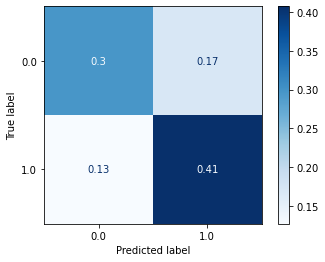

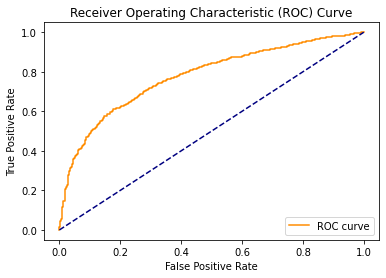

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
LogisticRegression(),NaN,0.7725,0.7774,0.7018,0.7037,NaN,NaN


In [312]:
model = LogisticRegression()
cmap='Blues'
model_stats=model_stats
track=True

model.fit(X_train, y_train)
print('CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data')
display(check_fit(model, X_train, y_train, X_test, y_test))
print('___'*20)

y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print('\nCHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score\n')
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(model, X_test, y_test, normalize='all', cmap=cmap)
print('___'*20)

print('\nCHECK Test ROC CURVE - seek to maximize area under the curve\n')
y_score_train = model.predict_proba(X_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_score_train[:,1])
train_auc = auc(fpr_train, tpr_train)

y_score = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
test_auc = auc(fpr, tpr)
print('AUC: {}'.format(test_auc))
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

stats_dict = {}

if model_stats is None:
    model_stats = pd.DataFrame(columns=['Model', 'Train AUC', 'Test AUC', 
                            'Train Accuracy', 'Test Accuracy',
                            'Train F1 Score', 'Test F1 Score'])
stats_dict['Model'] = str(model)
try:
    stats_dict['Train AUC'] = train_auc.round(4)
except Exception:
    pass
try:
    stats_dict['Test AUC'] = test_auc.round(4)
except Exception:
    pass
try:
    stats_dict['Train Accuracy'] = train_acc.round(4)
except Exception:
    pass
try:
    stats_dict['Test Accuracy'] = test_acc.round(4)
except Exception:
    pass
try:
    stats_dict['Train F1 Score'] = model.f1_score(y_train, y_train_pred).round(4)
except Exception:
    pass
try:
    stats_dict['Test F1 Score'] = model.f1_score(y_test, y_test_pred).round(4)
except Exception:
    pass

model_stats.append(pd.Series(stats_dict, name=str(model)))


In [299]:
stats_dict

{}

In [298]:
pd.Series(stats_dict, name=str(model))

<ipython-input-298-c377431bd2d8>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(stats_dict, name=str(model))


Series([], Name: LogisticRegression(), dtype: float64)

## Dummy Model - for comparison only

In [269]:
from sklearn.dummy import DummyClassifier

In [270]:
dummy_clf = DummyClassifier(strategy='stratified')

### Scaled data

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.518395,0.577713
Testing,0.491228,0.541301


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.46      0.42      0.44       717
         1.0       0.53      0.57      0.55       822

    accuracy                           0.50      1539
   macro avg       0.49      0.49      0.49      1539
weighted avg       0.50      0.50      0.50      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.5065026621466165


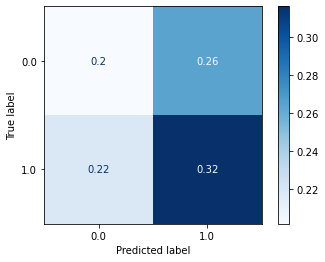

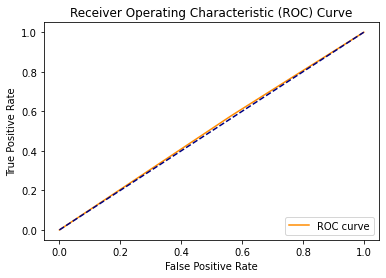

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [311]:
model = evaluate_classifier(dummy_clf, X_train_scaled, y_train, X_test_scaled, y_test, 
                    cmap='Blues', track=True)
model_stats

### Unscaled data

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.517559,0.575631
Testing,0.48603,0.53607


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.46      0.44      0.45       717
         1.0       0.53      0.56      0.54       822

    accuracy                           0.50      1539
   macro avg       0.50      0.50      0.50      1539
weighted avg       0.50      0.50      0.50      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.49767380305205194


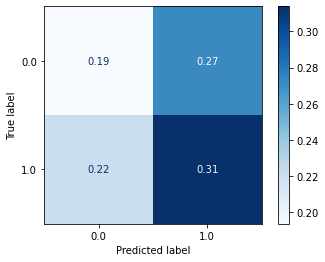

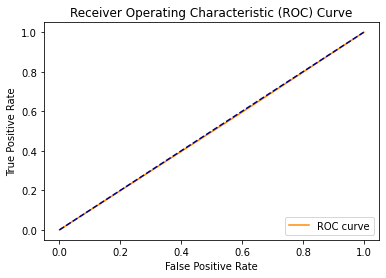

In [233]:
evaluate_classifier(dummy_clf, X_train, y_train, X_test, y_test, track=False)

## Logistic Regression

In [234]:
log_clf = LogisticRegression()

### Scaled data

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.732441,0.762611
Testing,0.741391,0.759662


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       717
         1.0       0.75      0.77      0.76       822

    accuracy                           0.74      1539
   macro avg       0.74      0.74      0.74      1539
weighted avg       0.74      0.74      0.74      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.8110707292822554


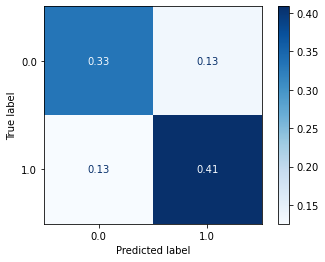

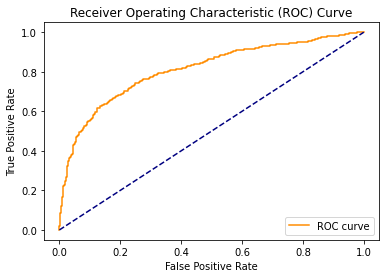

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [320]:
log_clf_eval = evaluate_classifier(log_clf, X_train_scaled, y_train, X_test_scaled, y_test, 
                                  model_stats=None, cmap='Blues')
log_clf_eval

In [319]:
model_stats

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


### Unscaled data

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,F1 Score
Training,0.701784,0.742044
Testing,0.703704,0.733333


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67       717
         1.0       0.71      0.76      0.73       822

    accuracy                           0.70      1539
   macro avg       0.70      0.70      0.70      1539
weighted avg       0.70      0.70      0.70      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.7773943200751985


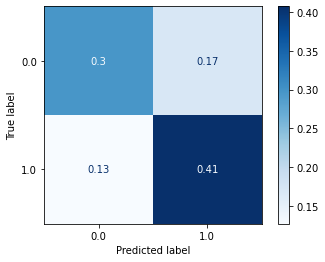

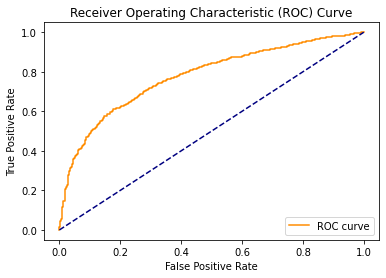

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [295]:
model_stats = evaluate_classifier(log_clf, X_train, y_train, X_test, y_test,
                                 model_stats=model_stats)
model_stats

## K-Nearest Neighbors

In [237]:
from sklearn.neighbors import KNeighborsClassifier

In [238]:
knn_clf = KNeighborsClassifier()

### Scaled data

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.763935,0.797804
Testing,0.625731,0.671608


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.62      0.52      0.56       717
         1.0       0.63      0.72      0.67       822

    accuracy                           0.63      1539
   macro avg       0.62      0.62      0.62      1539
weighted avg       0.62      0.63      0.62      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.6832554540919688


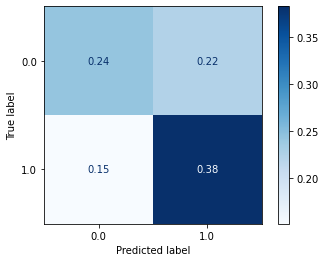

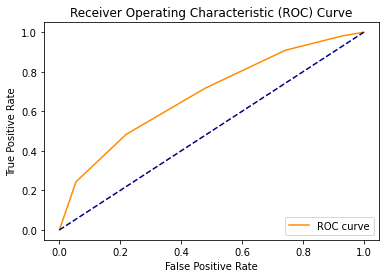

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [239]:
evaluate_classifier(knn_clf, X_train_scaled, y_train, X_test_scaled, y_test)

## Decision Tree

### Single Tree Classifier

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [241]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.841137,0.856568
Testing,0.683561,0.705384


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66       717
         1.0       0.70      0.71      0.71       822

    accuracy                           0.68      1539
   macro avg       0.68      0.68      0.68      1539
weighted avg       0.68      0.68      0.68      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.6977199537136012


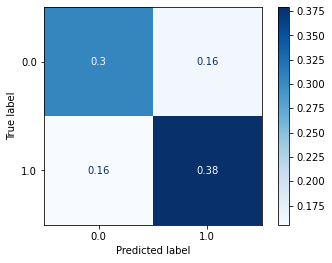

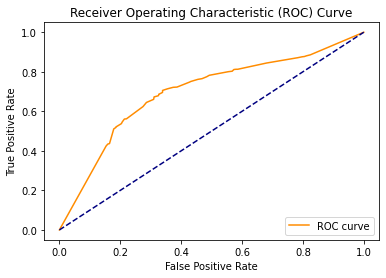

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [242]:
evaluate_classifier(dt_clf, X_train, y_train, X_test, y_test)

In [243]:
feat_importance_zip = dict(zip(X_train.columns, dt_clf.fit(X_train, y_train).feature_importances_))
feat_importance_zip = sorted(feat_importance_zip.items(), key=lambda item: item[1], reverse=True)
feat_importance_df = pd.DataFrame(feat_importance_zip, columns=['feature', 'importance'])

In [244]:
feat_importance_df

,feature,importance
0,age,0.318677
1,waist_circumference_cm,0.099773
2,BMI,0.098536
3,hip_circumference_cm,0.072547
4,weight_kg,0.066987
5,height_cm,0.062695
6,vigorous_activity_minsperweek,0.041075
7,income_poverty_ratio,0.040495
8,ratio_income_householdsize,0.036646
9,moderate_activity_minsperweek,0.028099


In [245]:
top_10_feats = feat_importance_df[0:10]
top_10_feats = top_10_feats.sort_values('importance', ascending=True)

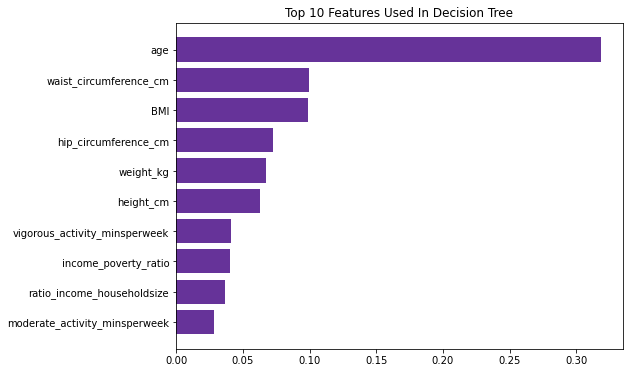

In [246]:
plt.figure(figsize=(8,6))
plt.barh(y=top_10_feats['feature'], width=top_10_feats['importance'], color='rebeccapurple')
plt.title('Top 10 Features Used In Decision Tree');

### Random Forest

In [247]:
from sklearn.ensemble import BaggingClassifier

In [248]:
rf_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.99777,0.998039
Testing,0.703054,0.719804


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68       717
         1.0       0.73      0.71      0.72       822

    accuracy                           0.70      1539
   macro avg       0.70      0.70      0.70      1539
weighted avg       0.70      0.70      0.70      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.7698150919450129


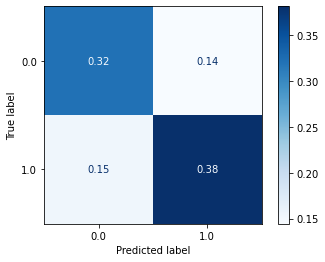

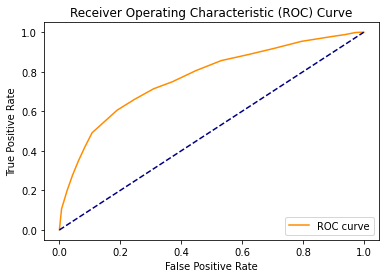

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [249]:
evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)

In [250]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [251]:
dt_clf = DecisionTreeClassifier()

In [252]:
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=5)
mean_dt_score = np.mean(dt_cv_score)
mean_dt_score

0.6259767757174548

In [253]:
dt_param_grid = {'criterion': ['entropy', 'gini'],
                'max_depth': [None, 3, 5, 7, 10, 15, 20],
#                 'min_samples_split': [None, 3, 4, 5, 10],
                'max_features': [None, 5, 7, 9, 11, 13, 15]}

In [254]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True).fit(X_train, y_train)

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.744705,0.78023
Testing,0.71475,0.744916


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68       717
         1.0       0.71      0.78      0.74       822

    accuracy                           0.71      1539
   macro avg       0.72      0.71      0.71      1539
weighted avg       0.71      0.71      0.71      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.7743648345532718


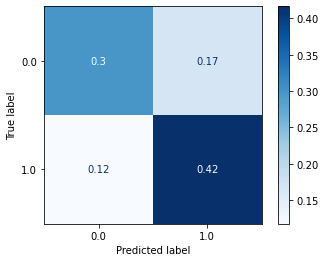

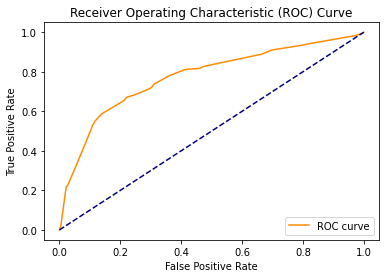

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [255]:
evaluate_classifier(dt_grid_search, X_train, y_train, X_test, y_test)

In [256]:
dt_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': None}

## Boosting Ensemble Methods

### AdaBoost

In [257]:
from sklearn.ensemble import AdaBoostClassifier

In [258]:
ab_clf = AdaBoostClassifier()

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.741918,0.769192
Testing,0.731644,0.749545


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       717
         1.0       0.75      0.75      0.75       822

    accuracy                           0.73      1539
   macro avg       0.73      0.73      0.73      1539
weighted avg       0.73      0.73      0.73      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.795088517647538


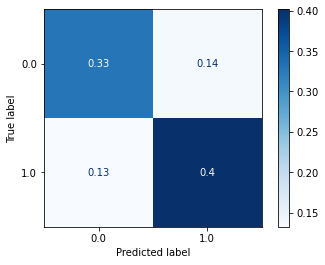

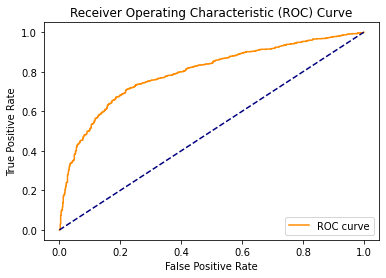

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [259]:
evaluate_classifier(ab_clf, X_train, y_train, X_test, y_test)

### GradientBoosting

In [260]:
from sklearn.ensemble import GradientBoostingClassifier

In [261]:
gb_clf = GradientBoostingClassifier()

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.791527,0.813559
Testing,0.738791,0.757246


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       717
         1.0       0.75      0.76      0.76       822

    accuracy                           0.74      1539
   macro avg       0.74      0.74      0.74      1539
weighted avg       0.74      0.74      0.74      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.8065057162345133


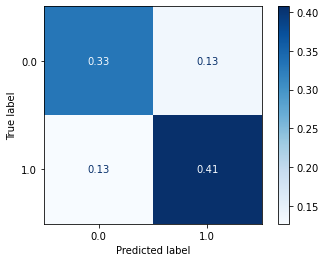

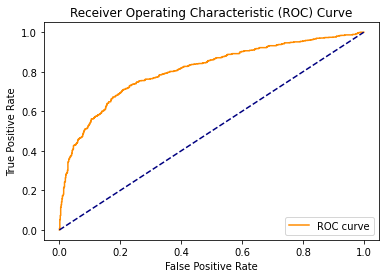

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [262]:
evaluate_classifier(gb_clf, X_train, y_train, X_test, y_test)

### XGBoost - unscaled

In [263]:
from xgboost import XGBClassifier

In [264]:
xgb_clf = XGBClassifier()

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.998885,0.99902
Testing,0.696556,0.724484


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       717
         1.0       0.70      0.75      0.72       822

    accuracy                           0.70      1539
   macro avg       0.70      0.69      0.69      1539
weighted avg       0.70      0.70      0.70      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.7715830694940734


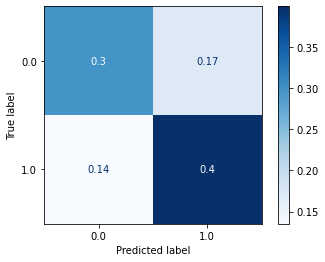

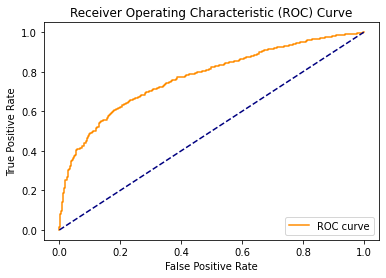

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [265]:
evaluate_classifier(xgb_clf, X_train, y_train, X_test, y_test)

### XGBoost - scaled

CHECK FOR OVERFITTING - seek for test data to perform almost as well as train data


,Accuracy,F1 Score
Training,0.998885,0.99902
Testing,0.697206,0.725236


____________________________________________________________

CHECK ACCURACY, PRECISION, RECALL, & F1 SCORE - seek to maximize accuracy and F1 score

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       717
         1.0       0.70      0.75      0.73       822

    accuracy                           0.70      1539
   macro avg       0.70      0.69      0.69      1539
weighted avg       0.70      0.70      0.70      1539

____________________________________________________________

CHECK Test ROC CURVE - seek to maximize area under the curve

AUC: 0.7715016271501628


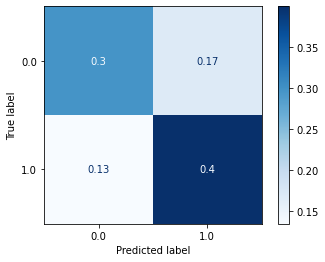

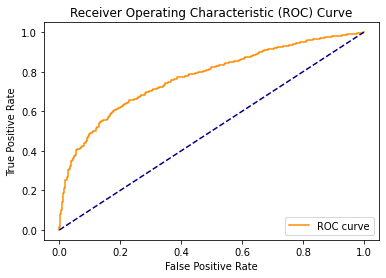

,Model,Train AUC,Test AUC,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [266]:
evaluate_classifier(xgb_clf, X_train_scaled, y_train, X_test_scaled, y_test)

# Caveats

- This model is not intended to predict diabetes in children under 18 or pregnant women

# Notes to self


In [267]:
# contin_feats = []
# cat_feats = []

# for col in X.columns:
#     if type(X[col].values[0]) == str:
#         cat_feats.append(col)
#     else:
#         contin_feats.append(col)
        
# print(contin_feats)
# print('_____'*10)
# print(cat_feats)